<div style="background:red"><h2>Concept</h2></div>


A vector function <br>
$$\mathbf r= \mathbf r(t),\qquad\qquad t\epsilon  \mathbf I$$
    
Is a regular parametric representation. The variable $t$ is defined on the interval $\mathbf I$. The interval has the following properties <br>
    
i)$\quad \mathbf r(t)$ is of class $C^1$ in $\mathbf I$ <br>
ii)$\quad \mathbf r'(t)\neq 0$ for all $t$ in $\mathbf I$ <br>
<br>

If a basis is chosen in $E^3$, or 3 dimensional Euclidean space, then <br>
$$r_1=r_1(t)\qquad r_2=r_2(t)\qquad r_3=r_3(t)$$
    
are the components of the curve with respect to the basis. Each scalar equation must satisfy the above properties but at least one $r_i'(t)\neq 0$.<br>

<div style="background:red">Example</div>
    The curve $\mathbf r(t)=r\cos(t)\mathbf e_1 + r\sin(t) \mathbf e_2$ for $-\infty < 0 < \infty$ is a regular parametric representation of a circle because the function is differentiable and
    defined on the interval for the basis.

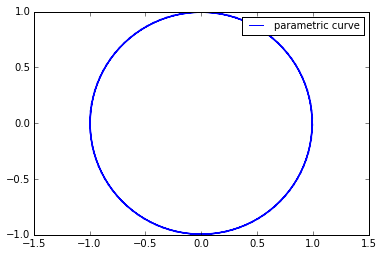

In [5]:
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca()
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
r =  1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, label='parametric curve')
ax.legend()
plt.axes().set_aspect('equal', 'datalim')

<div style="background:red">Theorem</div>
   if $\mathbf r= \mathbf r(t)$ is a regular parametric representation on $\mathbf I$ then for each $t_0$ in $\mathbf I$ there exists a neighbourhood of $t_0$ in which $\mathbf r(t)$ is one to one.<br>
   <br>
   This means that for each $t$ there is a unique point given by the curve. In the example of the circle, the function is one to many, or infinitely many multiples of the same point, this can be fixed by setting the interval to be between $0 < t < 2\pi$ to ensure that the curve only cyles once for all given values of $t$. <br>

 <div style="background:red">Change of Parameter</div>
 For a curve $\mathbf r=\mathbf r(\theta)$ on the interval $\mathbf I$ the real valued function $\theta=\theta(t)$ on the interval $\mathbf I_{t}$ is an allowable change of parameter if<br>
 $i) \quad \theta=\theta(t)$ is of class $C^1$ in $\mathbf I_{t}$. <br>
 $ii) \quad d\theta/d t \neq 0$ for all $t$ in $\mathbf I_{t}$ <br>
 <br>
 If $\theta=\theta(t)$ is an allowable change of parameter then $d\theta/dt$ is continuous and not equal to zero so is either greater than zero (smooth increasing) or less than zero (smooth decreasing).  
 <br>

 <div style="background:red">Theorem</div>
 If $\theta=\theta(t)$ is an allowable change of parameter for a function $\mathbf r=\mathbf r(\theta)$ then <br>
 $i) \quad\theta=\theta(t)$ is a one to one mapping of $\mathbf I_{t}$ onto an interval $\mathbf I_{\theta}=\theta(\mathbf I_t)$<br>
 $ii)\quad$ The inverse function $t=t(\theta)$ is an allowable change of parameter on $\mathbf I_{\theta}$.

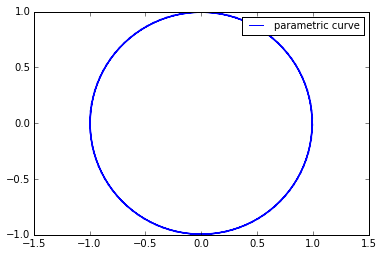

In [2]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca()
t = np.linspace(-4, 4, 100)
r =  1
theta = np.pi*t
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, label='parametric curve')
ax.legend()
plt.axes().set_aspect('equal', 'datalim')

 <div style="background:red">Defintion</div>
 A regular parametric representation $\mathbf r=\mathbf r(\theta)$ for $\theta \epsilon \mathbf I_{\theta}$ is equivalent to a regular parametric representation $\mathbf r=\mathbf {\bar r}(t)$ for $t \epsilon \mathbf I_t$ if there exists an allowable change of parameter $\theta=\theta(t)$ on $\mathbf I_t$  such that <br>
 $$
 i)\quad \theta(\mathbf I_{t}) = \mathbf I_{\theta} \qquad ii)\quad \mathbf r(\theta(t))=\mathbf{\bar r}(t)
 $$
 <br>
 This defines an equivalence relation on a set of regular representations. A regular curve can be defined as an equivalence class of regular parameteric representations. <br>
 Since a curve  $\mathbf r=\mathbf r(\theta)$ uniquely determines a curve $C$ and all representations related to it by an allowable change of parameter, any properties of the  $\mathbf r=\mathbf r(\theta)$ may not neccessarily be a property of the curve and may be properties of the parameter. Any properties of the curve must be independant of the parameter.<br>

<div style="background:red">Definition</div>
   <br>
   A regular curve  $\mathbf r = \mathbf r(t)$ on $t\epsilon \mathbf I $ is said to be simple if there are no multiple points and $t_1\neq t_2$ implies $\mathbf r(t_1)\neq \mathbf r(t_2)$. This is a property of the curve and not of the representation.
   If the interval $a\leq t\leq b$ is assigned then the curve $\mathbf r=\mathbf r(t)$ is called a regular arc and the points $\mathbf r(a)$ and $\mathbf r(b)$ are called the end points of the arc. An arc segment $\mathbf b = \mathbf r(t)$ for $a\leq t\leq b$ is the result of defining the interval $(a,b)$ of the arc as a subset of the interval of the curve $\mathbf I$ <br>
   A regular oriented curve is a curve along which a specific direction is chosen for an increase in the parameter. This can change for allowable reparameterizations because sometimes the derivative of the parameter with respect to its parameter is negative rather than positive, signifying a change in direction. 

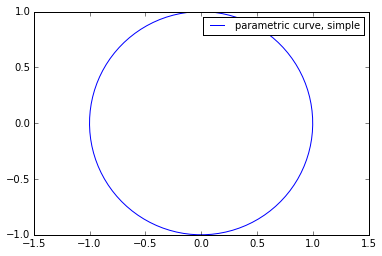

In [3]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca()
theta = np.linspace(0, 2 * np.pi, 100)
r =  1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, label='parametric curve, simple')
ax.legend()
plt.axes().set_aspect('equal', 'datalim')

<div style="background:red">Orthogonal projections</div>
    To project a curve onto a coordinate plane defined by the basis constitutes an orthogonal projection. This is achieved by setting the non-related component to zero ... i.e. <br>
    $$
    r_1=r_1(t)\qquad r_2=r_2(t)\qquad r_3=r_3(t)
    $$
    and to project onto the $\mathbf e_1 \mathbf e_2$ plane the parameter $r_3$ is set equal to zero. And likewise for the other planes.

C:\Users\dave\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


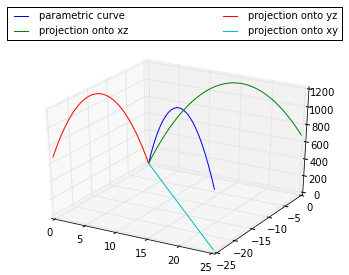

In [6]:
from matplotlib import cm
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
t = np.linspace(0, 25, 100)

# initial velocity
ux = 1
uy = -1
uz = 150

# acceleration due to gravity
a = -9.81

# x and y are initial velocity times time
x = ux*t
y = uy*t

# now the parabola
z = uz * t +0.5*a*t**2  

ax.plot(x, y, z, label='parametric curve')
y = 0 * t
ax.plot(x, y, z, label='projection onto xz')
y = uy * t
x = 0*t
ax.plot(x, y, z, label='projection onto yz')
x= ux * t
z =0 * t
ax.plot(x, y, z, label='projection onto xy')
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
#ax.legend()

<div style="background:red">Implicit representations of Curves</div>
    A curve may be represented implicitly as the intersection of two surfaces, or as the locus of points $x_1,\ x_2,\ x_3$ satisfying the relations <br>
    $$
    F_1(x_1,x_2,x_3)=0\qquad \qquad F_2(x_1,x_2,x_3)=0
    $$
    These equations can be solved if <br>
    $$
    \left |\begin{array}{ccc} \frac{\partial F_1}{\partial x_1} &  \frac{\partial F_1}{\partial x_2} \\  \frac{\partial F_2}{\partial x_1} &  \frac{\partial F_2}{\partial x_2} \end{array}\right|
    $$
    Then the curve can be represented as $x_1=x_1(x_3)$, $x_2=x_2(x_3)$. requires example.

### Arc Length
   
An arc length can be defined in terms of approximating vectors created by subdividing the interval into discrete subdivisions and evaluating the vector function at those points, creating an approximating polygonal arc. The approximate arc length is considered to be the sum of all these vectors and the arc length of the curve is the greatest of lengths of all possible approximating polygonal arcs. An arc $\mathbf r=\mathbf r(t)$ is said to have an approximating polygonal arc $S$ with an interval subdivision $\delta t$ and the arc is said to be rectifiable if the set of all $S$ is bounded from above, or has a supremum which is defined to be the length of the arc. This can be found using limits. 
   
A regular arc $\mathbf r=\mathbf r(t)$ on the interval $a \leq t \leq b$ is rectifiable and the length is given by the integral
   
$$
s = \displaystyle \int_a^b \left | \frac{d\mathbf r}{dt}\right | dt = \int_a^b \sqrt { \left(\frac{dx_1}{dt}\right)^2 +\left(\frac{dx_2}{dt}\right)^2+\left(\frac{dx_3}{dt}\right)^2}dt 
$$


In [7]:
from sympy import *
from sympy.vector import *
from __future__ import division

x,t = symbols('x t')

## define integral for parabola plotted above

ux,uy,uz,t = symbols('ux uy uz t')

## DO NOT use N for coordinate system 
## because N() is a function for printing numerical values
e = CoordSysCartesian('e')
x1 = ux*t
x2 = uy*t
a = S(-9.81)
x3 = uz*t + 0.5*(a*t**S(2)) 

r = x1*e.i + x2*e.j + x3 *e.k
rr = e.i - e.j +(150-9.81*t)*e.k
print r
dr = diff(r.subs({ux:S(1),uy:S(-1),uz:S(150)}),t)
print dr
print dr.magnitude()
print "Result of symbolic integration = "
print integrate(expand(dr.magnitude().doit()).doit() ,(t,0,25)).doit()



def numerical_integrate(expr,t1,t2, max_num):
    dt = S(t2-t1)/max_num
    mag = 0
    for i in range(0,max_num):
        expr1 = expr.subs({t:dt*i})
        expr2 = expr.subs({t:dt*(i+1)})
        expr3 = (expr2 - expr1).magnitude()                    
        mag += expr3
                        
    return mag

print "Result of numeric integration = "
print numerical_integrate(r.subs({ux:1, uy:-1, uz:150}),0,25,400)
##quad(lambda tt: exp.subs({t:tt}), [0, 25])

t*ux*e.i + t*uy*e.j + (-4.905*t**2 + t*uz)*e.k
e.i + (-1)*e.j + (-9.81*t + 150)*e.k
sqrt((-9.81*t + 150)**2 + 2)
Result of symbolic integration = 
1.0*Integral(sqrt(96.2361*t**2 - 2943.0*t + 22502.0), (t, 0, 25))
Result of numeric integration = 
1610.34763013904


$$\left|\frac{d \mathbf r}{d t}\right| = \sqrt{\left(\frac{d r_1}{dx}\right)^2+\left(\frac{dr_2}{dy}\right)^2+\left(\frac{dr_3}{dz}\right)^2 }$$

Here (this is the classic projectile parabola expressed in terms of the coordinate vectors)
   
$$\mathbf r = u_x t \mathbf i + u_y t \mathbf j +\left( \frac{-9.81 t^2}{2} + u_z t\right)\mathbf k$$
   
and

$$\frac{d \mathbf r}{dt} = u_x \mathbf i + u_y \mathbf j + (-9.81 t + u_z) \mathbf k $$

so the magnitude is 

$$\left|\frac{d \mathbf r}{d t}\right| = \sqrt{u_x^2+u_y^2+(-9.81 t + u_z)^2 }$$

To integrate this I need to change variables.

I will use G ... 
and $G = -9.81 t + u_x$
   
and $ dG/dt = -9.81$ and $dt = -dG/9.81$ 

$$ -\frac{1}{9.81}\int_{S_{G_0}}^{S_{G_1}}  \sqrt{u_x^2+u_y^2+G^2 }\ dG $$

but the limits have changed, from above, G takes the real interval $t\to -9.81t + u_z$, so the limits are $S_{G_1}=-9.81 \times 25 + u_z$, and $S_{G_0}=-9.81 \times (0) + u_z = u_z$,

This integral is a well known integration from a lookup table 

$$\int \sqrt{x^2 + a^2}\ dx = \frac{a^2}{2}\sinh^{-1}\left(\frac{x}{a}\right) + \frac{x}{2} \sqrt{x^2 + a^2} + C $$ 

So clearly $(x^2 + a^2)$ in  this case can be substituted with $a^2 = u_x^2 + u_y^2$ and $x = G$,  

$$-\frac{1}{9.81}\int_{S_{G_0}}^{S_{G_1}}  \sqrt{u_x^2+u_y^2+G^2 } dG = -\frac{1}{9.81}\left(\frac{u_x^2 + u_y^2}{2}\sinh^{-1}\left(\frac{G}{\sqrt{u_x^2 + u_y^2}}\right) + \frac{G}{2} \sqrt{u_x^2 + u_y^2 + G^2} + C \bigg\rvert_{S_{G_0}}^{S_{G_1}} \right) $$ 

I really don't how this was first solved ... the function $\sinh^{-1} (x) = \log ({x + \sqrt{x^2 + 1}}) $, at least approximately depending on how the machine does log ... so 

$$ s   = -\frac{1}{9.81}\left(\frac{u_x^2 + u_y^2}{2}\log\left(\frac{G}{\sqrt{u_x^2 + u_y^2}} + \sqrt{\frac{G^2}{u_x^2 + u_y^2} + 1}\right) + \frac{G}{2} \sqrt{u_x^2 + u_y^2 + G^2} + C \bigg\rvert_{S_{G_0}}^{S_{G_1}} \right)  $$

I might solve for $s$ but solving this equation for $G$ (and eventually $t$ ) will be difficult or impossible -    A different example may be more appropriate for the unit speed paramerization of the curve., since this is a curve from physics involving acceleration. 

> as a matter of fact both arcsinh() and log() have a series expansion, however there are problems with using this
   
> 1) Galois theory (see wikipedia)
   
> 2) Sympy does not seem to produce an expression for the standard quartic, although it is apparently solved.
   
> 3) The series for arcsinh() goes up to 7th degree within the first 4 terms
   
> 4) The series approximation for log() only starts to look good near the 10th degree (see below)
   


In [8]:
G = symbols('G')

lim1 = uz
lim2 = -9.81*25 + uz

sol =    -integrate( sqrt(ux**2 +uy**2 + G**2)/9.81 , (G,lim1, lim2 ))
#print sol
print "solution 1"
print N(sol.subs({ux:1,uy:-1,uz:150}))

s_expr = ((ux**2 + uy**2)/2) * asinh(G/sqrt(ux**2 + uy**2)) + (G/2) * sqrt(ux**2 + uy**2 + G**2)
sol2 = s_expr.subs({G:lim2, ux:1,uy:-1,uz:150}) - s_expr.subs({G:lim1, ux:1,uy:-1,uz:150})
print "solution 2"
print N(-sol2/9.81)

print "solution 3"
lim3 = -9.81*24 + uz
sol3 = s_expr.subs({G:lim2, ux:1,uy:-1,uz:150}) - s_expr.subs({G:lim3, ux:1,uy:-1,uz:150})
print N(-sol3/9.81)

solution 1
1610.35082325725
solution 2
1610.35082325725
solution 3
90.3560788938458


Now that we have arc length, it is interesting to try to solve for t, because then we can reparameterize the curve with arc length


$$ s   = -\frac{1}{9.81}\left(\frac{u_x^2 + u_y^2}{2}\log\left( G + \sqrt{G^2 + u_x^2 + u_y^2}\right) - \log(\sqrt(u_x^2 + u_y^2)) + \frac{G}{2} \sqrt{u_x^2 + u_y^2 + G^2} + C \bigg\rvert_{S_{G_0}}^{S_{G_1}} \right)  $$

or, setting $a = \sqrt(u_x^2 + u_y^2)$ and $ \lambda = -9.81$ and assuming the limits have already been input


$$ s   = -\frac{1}{\lambda}\left(\frac{a^2}{2}\left(\log\left( G + \sqrt{G^2 + a^2}\right) - \log(a)\right) + \frac{G}{2} \sqrt{ G^2 + a^2}  \right)  $$



In [372]:
t0 = symbols('t0') 
sol4 = s_expr.subs({ ux:1,uy:-1,uz:150, t:t0}) 
print s_expr

# had to redefine x here
x = symbols('x')

a,b,c,d,e = symbols('a,b,c,d,e')
# no solution to the quartic here
#solve(a*x**4 + b*x**3 + c*x**2 + d**x + e, x)

#series((-1)**(n+1)*(x-1)**n / n,5)

def series_expand(expr,n, MAX):
    ex2 = 0
    for i in range(1,MAX):
        ex2 += expr.subs({n:i})
        
    return ex2

n = symbols('n')
ex2 = series_expand((-1)**(n+1)*((x+sqrt(x**2+1))-1)**n / n, n, 4)
print "The 4th degree approximation"
print ex2.subs({x:t})

ex3 = series_expand((-1)**(n+1)*((x+sqrt(x**2+1))-1)**n / n, n, 8)
print "The 8th degree approximation"
print ex3.subs({x:t})

G*sqrt(G**2 + ux**2 + uy**2)/2 + (ux**2/2 + uy**2/2)*asinh(G/sqrt(ux**2 + uy**2))
The 4th degree approximation
t + sqrt(t**2 + 1) + (t + sqrt(t**2 + 1) - 1)**3/3 - (t + sqrt(t**2 + 1) - 1)**2/2 - 1
The 8th degree approximation
t + sqrt(t**2 + 1) + (t + sqrt(t**2 + 1) - 1)**7/7 - (t + sqrt(t**2 + 1) - 1)**6/6 + (t + sqrt(t**2 + 1) - 1)**5/5 - (t + sqrt(t**2 + 1) - 1)**4/4 + (t + sqrt(t**2 + 1) - 1)**3/3 - (t + sqrt(t**2 + 1) - 1)**2/2 - 1


So we can form a series approximation to the log function.
unfortunately the series approximation to the log function is not perfect, and we have
$$ ln(x) = log(x) = \sum_{n=1}^\infty \frac{(-1)^{n+1}}{n} (x-1)^n $$ 
and this works strictly for $|x-1| \leq 1 $
and another expression
$$ ln(x) = \sum_{n=1}^\infty\frac{1}{n} \left( \frac{x-1}{x}\right) ^n $$

for $Re(x) \geq 1/2 $ ... so we can model a finite discontinuity. I crunched some expressions and found out that the discontinuity happens at t=15 (obviously when vz = 150 - 9.81*t = 0, at 150/9.81 = 15.29)


In [9]:
init_printing(use_latex=true)
latex(simplify( (G / (sqrt(ux**2 + uy**2)) + sqrt(G**2/(ux**2 + uy**2)+1 ))) )

'\\frac{1}{\\sqrt{ux^{2} + uy^{2}}} \\left(G + \\sqrt{\\frac{G^{2} + ux^{2} + uy^{2}}{ux^{2} + uy^{2}}} \\sqrt{ux^{2} + uy^{2}}\\right)'

The 2th degree approximation


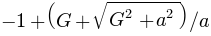

In [374]:
ex2 = series_expand((-1)**(n+1)*(x-1)**n / n, n, 2)
print "The 2th degree approximation"
ex2.subs({x:(G+sqrt(G**2 + a**2))/a})

$$ s   = -\frac{1}{\lambda}\left(\frac{a^2}{2}\left(\log\left( G + \sqrt{G^2 + a^2}\right) - \log(a)\right) + \frac{G}{2} \sqrt{ G^2 + a^2}  \right)  $$

and the 2nd degree approximation is this

$$ s   = -\frac{1}{\lambda}\left(\frac{a^2}{2}\left( G + \sqrt{G^2 + a^2} -1 - a+1 \right)+ \frac{G}{2} \sqrt{ G^2 + a^2}  \right)  $$

347.021077277739
352.994773096610


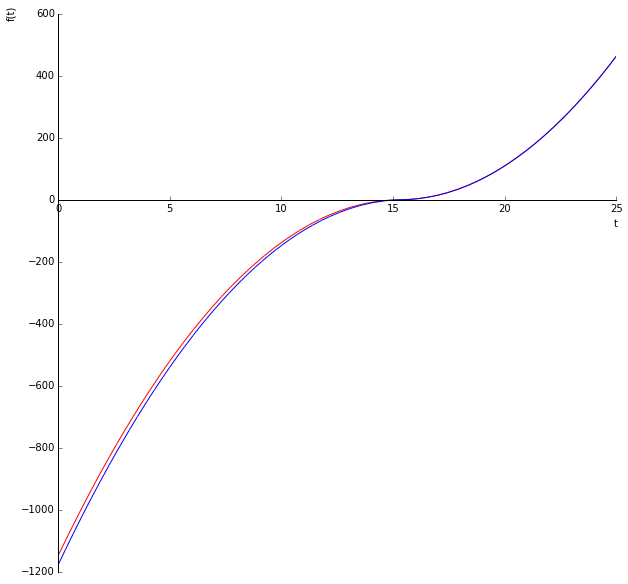

In [375]:
from sympy.plotting import plot
G = symbols('G')
TG = -9.81 * t + uz
TG2 = TG.subs({t:5})
TG1 = TG.subs({t:2})
#s_expr = s_expr.subs({ux:1,uy:-1,uz:150})
#print s_expr.subs({G:-9.81 * t + uz,ux:1,uy:-1,uz:150})
print -N(s_expr.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81

s_expr2 = ((ux**2 + uy**2)/2) * (G+sqrt(G**2 + ux**2 + uy**2) - 1) - ((ux**2 + uy**2)/2) *(sqrt(ux**2 + uy**2)+1) + (G/2)*sqrt(G**2 + ux**2 + uy**2)
print -N(s_expr2.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr2.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81


actual_curve = -(1/9.81)*s_expr.subs({G:-9.81 * t + uz,ux:1,uy:-1,uz:150})
approx_curve = -(1/9.81)*s_expr2.subs({G:-9.81 * t + uz,ux:1,uy:-1,uz:150})
p1 = plot(actual_curve,(t,0,25), show=false,line_color='r')
p2 = plot( approx_curve,(t,0,25), show=false)
p1.extend(p2)
p1.show()



The approximation is best above t=15

In [376]:
TG2 = TG.subs({t:25})
TG1 = TG.subs({t:0})
#s_expr = s_expr.subs({ux:1,uy:-1,uz:150})
#print s_expr.subs({G:-9.81 * t + uz,ux:1,uy:-1,uz:150})
print -N(s_expr.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81
print -N(s_expr2.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr2.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81


1610.35082325725
1639.88556368463


In [377]:
ex2_1 = series_expand((1/n)*((x-1) /x)**n, n, 2)
#ex2_1 = 1 /x
print "The 2th degree approximation"
ex2_11 = ex2_1.subs({x:(G+sqrt(G**2 + a**2))}).doit()

#ex2_2 = series_expand((1/n)*((x-1) /x)**n, n, 2)
#ex2_1 = 1 /x
print "The 2th degree approximation"
ex2_12 = ex2_1.subs({x:a}).doit()
ex2_12

The 2th degree approximation
The 2th degree approximation


(x - 1)/x


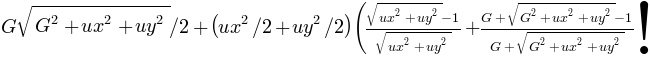

In [378]:
A = symbols('A')
s_expr_3 = ((ux**2 + uy**2)/2) * A + (G/2) * sqrt(ux**2 + uy**2 + G**2)
print ex2_1
s_expr_3 = s_expr_3.subs({A:(ex2_11 + ex2_12) }).doit()
s_expr_3 = s_expr_3.subs({a:sqrt(ux**2 + uy**2)}).doit()
s_expr_3

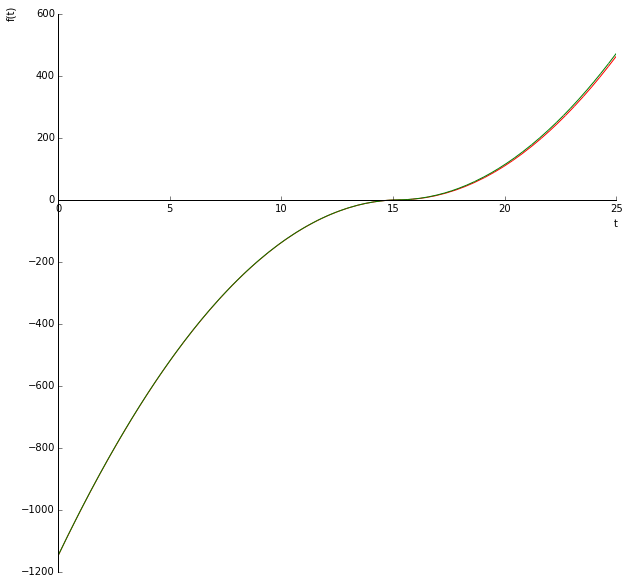

In [379]:
actual_curve = -(1/9.81)*s_expr.subs({G:-9.81 * t + uz,ux:1,uy:-1,uz:150})
#approx_curve = -(1/9.81)*s_expr2.subs({G:-9.81 * t + uz,ux:1,uy:-1,uz:150})
approx_curve2 = -(1/9.81)*s_expr_3.subs({G:-9.81 * t + uz,ux:1,uy:-1,uz:150})
p1 = plot(actual_curve,(t,0,25), show=false,line_color='r')
#p2 = plot( approx_curve,(t,0,25), show=false)
p3 = plot(approx_curve2,(t,0,25), show=false,line_color='g')
#p1.extend(p2)
p1.extend(p3)
p1.show()

This approximation is best below t=15

In [380]:
TG2 = TG.subs({t:15}) # or 15.29
TG1 = TG.subs({t:0})
print "Comparing 3 expressions for t=0,15"
print -N(s_expr.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81
print -N(s_expr_3.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr_3.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81
print -N(s_expr2.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr2.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81

TG2 = TG.subs({t:25})
TG1 = TG.subs({t:15}) # or 15.29
print "Comparing 3 expressions for t = 15,25"
print -N(s_expr.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81
print -N(s_expr_3.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr_3.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81
print -N(s_expr2.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr2.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81

Comparing 3 expressions for t=0,15
1146.77604698369
1146.39436157494
1176.34467944414
Comparing 3 expressions for t = 15,25
463.574776273563
472.620228346776
463.540884240490


In [381]:
TG2 = TG.subs({t:25})
TG1 = TG.subs({t:15}) # in fact at 15.29
TG0 = TG.subs({t:0})
print -N(s_expr.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr.subs({G:TG0,ux:1,uy:-1,uz:150})) / 9.81
s2= -N(s_expr_3.subs({G:TG1,ux:1,uy:-1,uz:150}) - s_expr_3.subs({G:TG0,ux:1,uy:-1,uz:150})) / 9.81
s3= -N(s_expr2.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr2.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81
s4 = s2+s3
print s4

print "error of actual result from t = 15,25"
print -N(s_expr.subs({G:TG2,ux:1,uy:-1,uz:150}) - s_expr.subs({G:TG1,ux:1,uy:-1,uz:150})) / 9.81 - s3
print "error of actual result from t = 0,15"
print -N(s_expr.subs({G:TG1,ux:1,uy:-1,uz:150}) - s_expr.subs({G:TG0,ux:1,uy:-1,uz:150})) / 9.81 - s2


# note: the approximations could be better if not using log(G/a) = log(G) - log(a)

1610.35082325725
1609.93524581543
error of actual result from t = 15,25
0.0338920330720498
error of actual result from t = 0,15
0.381685408744943


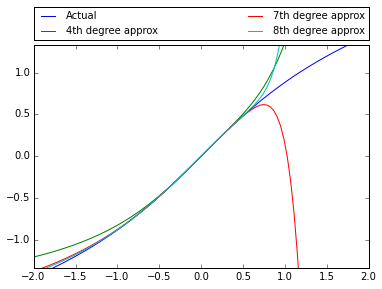

In [20]:


mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca()
t = np.linspace(-2, 2, 100)
r =  1
xx = t
# example set 
yy = np.arcsinh(t)
ax.plot(xx, yy, label='Actual')
yy = t + np.sqrt(t**2 + 1) + (t + np.sqrt(t**2 + 1) - 1)**3/3 - (t + np.sqrt(t**2 + 1) - 1)**2/2 - 1


ax.plot(xx, yy, label='4th degree approx')

yy = t + np.sqrt(t**2 + 1) - (t + np.sqrt(t**2 + 1) - 1)**6/6 + (t + np.sqrt(t**2 + 1) - 1)**5/5 - (t + np.sqrt(t**2 + 1) - 1)**4/4 + (t + np.sqrt(t**2 + 1) - 1)**3/3 - (t + np.sqrt(t**2 + 1) - 1)**2/2 - 1
ax.plot(xx, yy, label='7th degree approx')
yy = t + np.sqrt(t**2 + 1) + (t + np.sqrt(t**2 + 1) - 1)**7/7 - (t + np.sqrt(t**2 + 1) - 1)**6/6 + (t + np.sqrt(t**2 + 1) - 1)**5/5 - (t + np.sqrt(t**2 + 1) - 1)**4/4 + (t + np.sqrt(t**2 + 1) - 1)**3/3 - (t + np.sqrt(t**2 + 1) - 1)**2/2 - 1
ax.plot(xx, yy, label='8th degree approx')
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylim(-1,1)
plt.axes().set_aspect('equal', 'datalim')

### BUT THIS DOES NOT SEEM TO WORK, THE BIJECTIVE MAPPING IS UNSATISFACTORY, I NEED TO REPARAMETERIZE~

From wikipedia, the general equation $ y = a\ x^2 + b\ x + c$ can be arranged into the form of a standard parabola ...
   
First step: Completing the square. 
$$=> a\ x^2 + b\ x + c = a( x^2 + \frac{b}{a}x + \frac{c}{a} )$$
   
therefore, then removing the $c$ as follows  
$$ a\left( x^2 + \frac{b}{a}x \right)+ c \qquad (1) $$
   
now to complete the square, if we have $a(x+\frac{b}{a})^2 =a\ (x^2 + 2 \frac{b}{a}x + \frac{b^2}{a^2}) $ and comparing this to the term in brackets above in (1) we can see that we need to divide the $\frac{b}{a}$ by 2 and subtract its square 
   
$$ a\left(\left( x + \frac{b}{2a} \right)^2  - \frac{b^2}{4a^2} \right) + c   $$
   
and this simplifies to
   
$$ a \left( x + \frac{b}{2a} \right)^2 - \frac{b^2}{4a}  + c $$

and finally:
   
$$ a\left( x + \frac{b}{2a} \right)^2 + \frac{4ac - b^2}{4a}  $$
   
This is said to be a parabola with certain properties ...
   
1) The axis $x = \frac{b}{2a} $ parallel to the y axis
   
2) focal length $\frac{1}{4a}$ and a quantity called the *semi latus rectum* $p = \frac{1}{2a} $
   
3) Vertex $ V=\left(-{\frac {b}{2a}},{\frac {4ac-b^{2}}{4a}}\right)$
   
4) Focus  $ F=\left(-{\frac {b}{2a}},{\frac {4ac-b^{2}+1}{4a}}\right)$
   
5) Directrix $\displaystyle y={\frac {4ac-b^{2}-1}{4a}}$

### Note:
variables $u$ and $v$ here denote <b>curvilinear coordinate parameters / lines </b> and $\bar{x_i}$ are the coordinate vectors.

In orthogonal curvilinear coordinates, the line element is $ (ds)^2 = (h_1)^2 (d \bar{x_1})^2+(h_2)^2 (d\bar{x_2})^2+(h_3)^2 (d\bar{x_3})^2$, and in paraboloidal coordinates, $h_1 = h_2 = \sqrt{ u^2 + v^2 }$ and $h_3 = uv$, and $\bar{x_1} = u$, $\bar{x_2} = v$ and $\bar{x_3} = \phi$ so the line element is  
   
$$ (ds)^2 = (u^2 + v^2) (d\bar{x_1})^2+(u^2 + v^2) (d\bar{x_2})^2+ u\ v (d\bar{x_3})^2$$

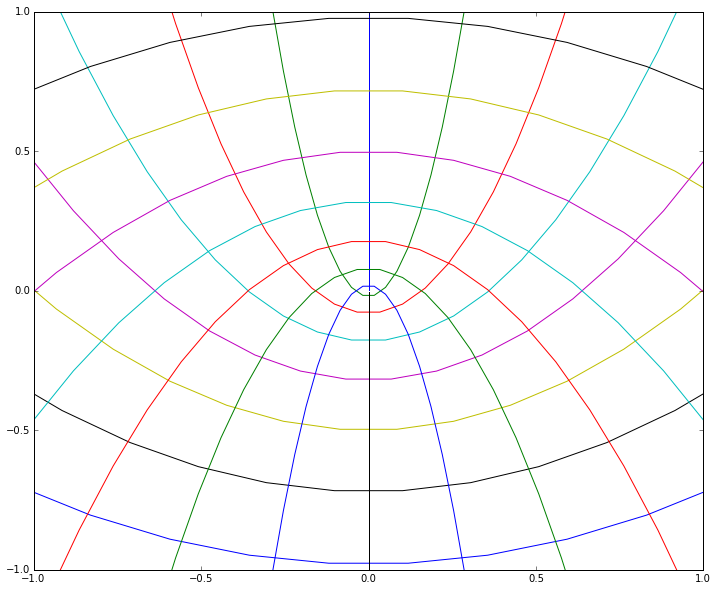

In [5]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
theta = np.linspace(0, 2* np.pi, 100)
u = np.linspace(-5, 5, 60)
for i in range(0,20):
    v = 4*i/20
    x  = 0.5 * (u**2 -v**2)
    y = u*v
    z = 0
    ax.plot(y, x, label='parametric curve')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)

v= np.linspace(-5, 5, 60)
for i in range(0,20):
    u = 4*i/20
    x  = 0.5 * (u**2 -v**2)
    y = u*v
    z = 0
    ax.plot(y, x,  label='parametric curve')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)

hopping back for our original function of position (the classic formula $s=s_0 + v\ t + 0.5 a t^2$ already has a constant $a$ and that's the acceleration. This should not be confused with the constant $a$ in the expression above because of the factor 0.5, so the acceleration will remain a numerical value -9.81 ). So ...
   
$$\mathbf r = u_x t \mathbf i + u_y t \mathbf j +\left( \frac{-9.81 t^2}{2} + u_z t\right)\mathbf k$$
  
or 
   
$$ \mathbf r = \mathbf r_0 + \mathbf u_0\ t + \frac{\mathbf a}{2} t^2 $$

and $\mathbf r_0 = \mathbf 0$. 
   
and as we know, this is a parabola, but it vectors do not define the division operator so we have to complete the square for each component as above, we replace $a$ with $\frac{ -9.81 }{2}$, and $b$ with $u_z$ and $c$ with $\mathbf r_0$ and $t$ with $x$
   
$$ a\left( x + \frac{b}{2a} \right)^2 + \frac{4ac - b^2}{4a}  $$
   
The $\mathbf i$ and $\mathbf j$ components are trivial since $a=0$ and no $c=0$, leaving only what is already there.
For the $\mathbf k$ component (and relabelling $g=-9.81$ )
   

$$ \left( \frac{ g }{2}\right)\left( t + \frac{u_z}{2\left( \frac{ g }{2}\right)} \right)^2 + \frac{4\left( \frac{ g }{2}\right)(0) - u_z^2}{4\left( \frac{ g }{2}\right)}  $$

becomes

$$ \left( \frac{ g }{2}\right)\left( t + \frac{u_z}{g} \right)^2 - \frac{ u_z^2}{2g}  $$

   





In [23]:
#checking 
P_Vertex_t = -150/((-9.81))
print "Vertex t"
print P_Vertex_t
print "this is the projection of the vector in the xy plane onto i, since time is increasing in units"
print "the span given by the vertex position is rotated by the direction cosine"
mag_vector_xy = sqrt( (1)**2 + (-1)**2 )
P_Vertex_x =   P_Vertex_t/mag_vector_xy
print "Vertex x rotated to phi = 0"
print N(P_Vertex_x)
print P_Vertex_t * cos(3.14159/4)
P_Vertex_z = -150**2/(2*(-9.81))
print "Vertex z"
print P_Vertex_z
print "Focus_x = Vertex_x"
print "Focus_z"
Focus_z = (1-150**2)/(2*(-9.81))
print Focus_z

Vertex t
15.2905198777
this is the projection of the vector in the xy plane onto i, since time is increasing in units
the span given by the vertex position is rotated by the direction cosine
Vertex x rotated to phi = 0
10.8120302933723
10.8120374660432
Vertex z
1146.78899083
Focus_x = Vertex_x
Focus_z
1146.73802243


So clearly this is working, the vertex is at the point on the curve where $t=15.29 \approx 15$ from earlier
   
from wolfram-mathworld, the equations for $x,y,z$ are:
   
$$ u= \sqrt{\sqrt{x^2+y^2+z^2} +z},\quad v=\sqrt{\sqrt{x^2+y^2+z^2} -z},\quad \phi = actan\left(\frac{y}{x}\right)$$

so, keeping $u$ and $\phi$ fixed, we have the value of $\phi = arctan\left(\frac{u_y}{u_x}\right)$, then noting that the value of $u$ will also not change through time.
   
$$ \frac{d s}{d t} = \sqrt{(u^2 + v^2) \left(\frac{d \bar{x_1}}{dt}\right)^2+(u^2 + v^2) \left(\frac{d\bar{x_2}}{d t}\right)^2+ u\ v \left(\frac{d\bar{x_3}}{d t}\right)^2 } = \sqrt{ (u^2 + v^2) \left(\frac{d\bar{x_2}}{d t}\right)^2 }= \sqrt{ (u^2 + v^2) \left(\frac{d v}{d t}\right)^2 }$$

and the arc length integral becomes:-


   
   $$
s = \displaystyle \int \left | \frac{d\mathbf r}{dt}\right | dt = \int \sqrt{ (u^2 + v^2) \left(\frac{d v}{d t}\right)^2 } dt =\int \sqrt{ (u^2 + v^2)  } \left(\frac{d v}{d t}\right) dt=\int \sqrt{ (u^2 + v^2)  } d v  
$$

and we as know...


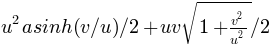

In [24]:
u,v = symbols('u,v')
integrate(sqrt(u**2 + v**2),v)

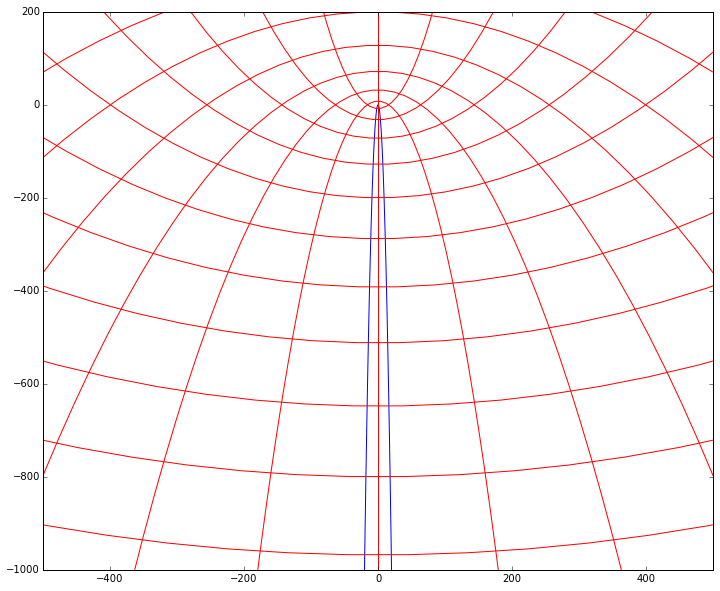

In [25]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)

tt = np.linspace(0, 50, 100)
zz = (-9.81/2)*(tt - 150/9.81)**2 + 1/(2*9.81) 
xx = (np.sqrt(2)*(tt-150/(9.81))) 

##this is very strange, I have the wrong equation here according to the above derivation ... logic seems denied

## OK for the x axis, transofmed into X-prime or whatever, with the rotated phi coordinate, the plot shows
## the result of Transformed *time* not location. 

ax.plot(xx, zz, label='parametric curve')
ax.set_xlim(-500,500)
ax.set_ylim(-1000,200)
theta = np.linspace(0, 2* np.pi, 100)
u = np.linspace(-50, 50, 50)
for i in range(0,20):
    v = 4*i
    x  = 0.5 * (u**2 -v**2)
    y = u*v
    z = 0
    ax.plot(y, x, label='parametric curve', color='r')
    #ax.set_xlim(-1,1)
    #ax.set_ylim(-1,1)

v= np.linspace(-50, 50, 50)
for i in range(0,20):
    u = 4*i
    x  = 0.5 * (u**2 -v**2)
    y = u*v
    z = 0
    ax.plot(y, x,  label='parametric curve', color='r')
    #ax.set_xlim(-1,1)
    #ax.set_ylim(-1,1)

$$u^2 = \sqrt{x^2+y^2 + z^2} + z = \sqrt{ \left(\sqrt{2}\left( t + \frac{u_z}{ g}\right) \right)^2 + \left( \left( \frac{ g }{2}\right)\left( t + \frac{u_z}{g} \right)^2 - \frac{ 1}{2g}\right)^2} + \left( \frac{ g }{2}\right)\left( t + \frac{u_z}{g} \right)^2 -\frac{ 1}{2g} $$


(g*t*(g*t + 2*uz) + uz**2 - 1)/g
sqrt(2*t**2 + 4*t*uz/g + 2*uz**2/g**2)
2*t**2 + 4*t*uz/g + 2*uz**2/g**2
True


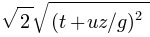

In [10]:
from sympy import *
g,uz,t=symbols('g uz t')
u_pow2 = sqrt( 2*(t+uz/g)**2 + ((g/2)*(t+uz/g)**2 - 1/(2*g))**2 ) + (g/2)*(t+uz/g)**2 - 1/(2*g)
v_pow2 = sqrt( 2*(t+uz/g)**2 + ((g/2)*(t+uz/g)**2 - 1/(2*g))**2 ) - (g/2)*(t+uz/g)**2 + 1/(2*g)
print simplify(expand(u_pow2)-expand(v_pow2))
print sqrt(simplify(expand((u_pow2)) *expand(( v_pow2))))
print expand(2*(t+uz/g)**2)
print sqrt(expand(2*(t+uz/g)**2)) == sqrt(simplify(expand((u_pow2)) *expand(( v_pow2))))
sqrt(2*(t+uz/g)**2)

In [387]:
simplify(expand(u_pow2)-expand(v_pow2))

In [388]:
g*t**2 + 2*uz*t + uz**2/g - 1/g == simplify(g*expand((t+uz/g)**2)) - 1/g

True

Therefore the mathematica expressions for converting the vector $\mathbf r$ into u and v do in fact work.

In [389]:
t,g,u,v = symbols('t,g,u,v')
sol = integrate(sqrt(u**2 + v**2),v).subs({u:sqrt(u_pow2), v:sqrt(v_pow2)})
print N(sol.subs({g:-9.81, t:25,uz:150}) -sol.subs({g:-9.81, t:0,uz:150}))


-684.421325067029


Perhaps my bad luck that this does not evaluate to the solution, or perhaps I did not insert the variables correctly for the definite integration - this attempt expressed u and v both as functions of x, y and z, but I was unable to fix the u coordinate in any way using this method (to integrate over v only). The next idea actually works but I suspect it might just sort out into the cartesian case after simplification. 

> Fact Established: The u,v pure coordinates can be converted back into cartersian via proof.


Now the other derivation is based on a strong mathematical principle from geometry

> Every parabola is similar to the unit parabola $y=x^2$. See wikipedia: <a href="https://en.wikipedia.org/wiki/Parabola#Any_parabola_is_similar_to_the_unit_parabola_y.3Dx.C2.B2"> parabola similarity </a>

using this definition, our curve should fit nicely into the paraboloidal coordinate system, using the fact that this is the same set of curves from the cylindrical parabolic system with the x axis relabelled as z, and from the definition on wikipedia of parabolic cylindrical coordinates, curves of constant $\sigma$ form confocal parabolae of the type $2\ y = \frac{x^2}{\sigma^2} - \sigma^2$, well from inspection, the formula for the z coordinate  

$$ z = \left( \frac{ g }{2}\right)\left( t + \frac{u_z}{g} \right)^2 - \frac{ 1}{2g}   $$

shows that after multiplying throughout by 2 we have a curve of constant $1/\sqrt{g}$ ... this is very fortunate, but perhaps hardly surprising. The defining feature of the curve is not the $g^{-1/2}$ but the initial velocity components. 

The x coordinate 

$$ x = u\ v \cos(\phi) = \sqrt{2}\left( t + \frac{u_z}{ g}\right) $$

remembering that the g = -9.81, $\sqrt{g}=\sqrt{-9.81} = 9.81 i $, a complex number, this does not seem to matter here ... and

$$ z = \frac{1}{2}(u^2-v^2) = \frac{ 1 }{2}\left( \left( g\right)\left( t + \frac{u_z}{g} \right)^2 - \frac{ 1}{g}\right)   $$

so either (case 1)

$$u =  \sqrt{g} \left( t + \frac{u_z}{g} \right) \qquad v = \frac{1}{\sqrt{g}} $$

I should note, that z can be a function of x if we put $t = \frac{x-x_0}{v_x} $ that's distance over velocity, with x_0 being the initial x coordinate. I rationalize that the independance of time or $z=z(x)=z(x(t))$ is given by writing that 

$$ u =  \sqrt{g} \left( t + \frac{u_z}{g} \right) =  \sqrt{g}\frac{x}{ |\mathbf u_{xy}|} $$

and so we use this $u$ as a function of x because the *defining features* of the curve are the initial velocity components. Otherwise the integral does not make *sense* to me when I imagine integrating over the reciprocal complex gravitational acceleration.

so
   
$$ z = \frac{1}{2}(u^2-v^2) = \frac{ 1 }{2}\left( \left( g\right)\left( \frac{x^2}{ |\mathbf u_{xy}|^2}\right) - \frac{ 1}{g}\right)   $$


so, swapping $u$ and $v$ through the principle of  symetry, 

$$\frac{u^2}{2} sinh^{-1}\left(\frac{v}{u}\right) + \frac{uv}{2}\sqrt{1+\frac{v^2}{u^2}} $$ becomes

$$\frac{\left(\frac{1}{\sqrt{g}}\right)^2}{2} sinh^{-1}\left(\frac{ \sqrt{g} \left( t + \frac{u_z}{g} \right)}{\frac{1}{\sqrt{g}}}\right) + \frac{\left(\frac{1}{\sqrt{g}}\right) \sqrt{g} \left( t + \frac{u_z}{g} \right)}{2}\sqrt{1+\frac{ g \left( t + \frac{u_z}{g} \right)^2}{\left(\frac{1}{\sqrt{g}}\right)^2}} $$ 

this complex integral is easily evaluated by sympy below, no problem 

In [3]:
t,g,u,v = symbols('t,g,u,v')
sol = 2*integrate(sqrt(u**2 + v**2),v).subs({u:(1/sqrt(g)), v:sqrt(g)*(t+uz/g)*1/(sqrt(2))})
print N(sol.subs({g:-9.81, t:25,uz:150}) -sol.subs({g:-9.81, t:0,uz:150}))

sol = 2*integrate(sqrt(u**2 + v**2),v).subs({v:(1/sqrt(g)), u:sqrt(g)*(t+uz/g)*1/(sqrt(2))})
print N(sol.subs({g:-9.81, t:25,uz:150}) -sol.subs({g:-9.81, t:0,uz:150}))
#sol = integrate(sqrt(u**2 + v**2),v).subs({u:(1/sqrt(g)), v:sqrt(g)*(t+uz/g)})
#print N(sol.subs({g:-9.81, t:25,uz:150}) -sol.subs({g:-9.81, t:0,uz:150}))

print "I interpret this to mean we were correct to swap u and v, also the complex nature of u means "
print " that it cannot be easily visualized on the same graph. "

1610.35082325725
35.3561638931798
I interpret this to mean we were correct to swap u and v, also the complex nature of u means 
 that it cannot be easily visualized on the same graph. 



   
This is fine, now there is one more thing to be established - and the most important part in this exersize. The effect of stepping up linearly in v (that is the new v after I swapped them.) 

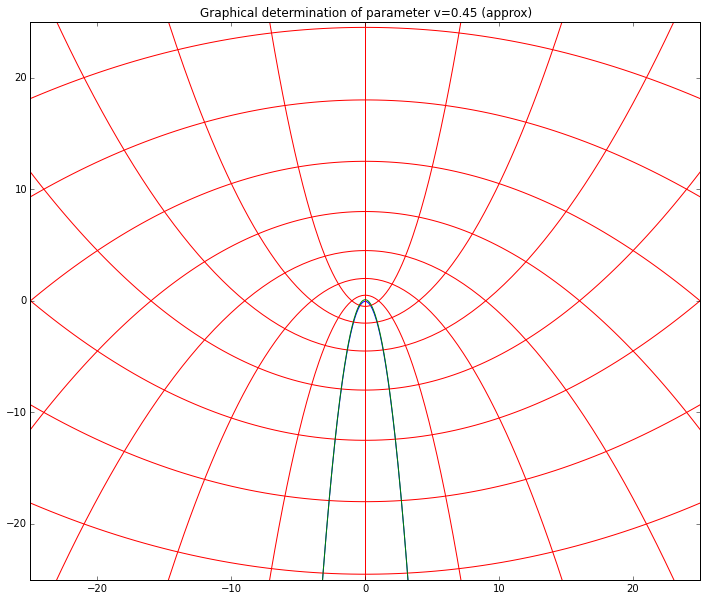

In [7]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)

tt = np.linspace(0, 50, 1000)
zz = (-9.81/2)*(tt - 150/9.81)**2 - 1/(2*9.81) 
xx = (np.sqrt(2)*(tt-150/(9.81))) 



ax.plot(xx, zz, label='parametric curve')

ax.set_xlim(-25,25)
ax.set_ylim(-25,25)
theta = np.linspace(0, 2* np.pi, 1000)
u = np.linspace(-50, 50, 1000)
for i in range(0,20):
    v = i
    x  = 0.5 * (u**2 -v**2)
    y = u*v
    z = 0
    ax.plot(y, x, label='parametric curve', color='r')
    #ax.set_xlim(-1,1)
    #ax.set_ylim(-1,1)

v= np.linspace(-50, 50, 1000)
#for i in range(1,2):


for i in range(0,20):
    u = i
    x  = 0.5 * (u**2 -v**2)
    y = u*v
    z = 0
    ax.plot(y, x,  label='parametric curve', color='r')
    #ax.set_xlim(-1,1)
    #ax.set_ylim(-1,1)
    
u = 0.45#i/2
x  = 0.5 * (u**2 -v**2)
y = u*v
z = 0
ax.plot(y, x, label='parametric curve', color='g')
plt.title('Graphical determination of parameter v=0.45 (approx)')

In [390]:
print sqrt(u_pow2.subs({t:0,uz:150,g:-9.81}))
print sqrt(u_pow2.subs({t:25,uz:150,g:-9.81}))

0.451513608353337
0.451498764506172


In [391]:
print sqrt(v_pow2.subs({t:0,uz:150,g:-9.81}))
print sqrt(v_pow2.subs({t:25,uz:150,g:-9.81}))

47.8923784060754
30.4126601267719


To recapitulate, the curve, $\mathbf r(t)$ is translated by the quantity called the *axis of the parabola* on the x axis. This is achieved by effectively *shifting* the parameter $t$. So at t=0 the x coordinate is 

$$ x = \sqrt{2}\left( (0) + \frac{u_z}{ g}\right) =\sqrt{2}\left(\frac{u_z}{ g}\right) = - \sqrt(2)\left(\frac{150}{ 9.81}\right) $$

and at t=25 the value is 
   
$$ x  = \sqrt{2}\left( 25 + \frac{u_z}{ g}\right) $$



In [392]:
print N(-sqrt(2)*(150/9.81))
print N(sqrt(2)*(25-150/9.81))

-21.6240605867446
13.7312784725828


Now obviously at t=25 the projectile has not hit the ground again. Now for the value of 
z at this point ...

$$ z = \frac{ 1 }{2}\left( \left( g\right)\left( t + \frac{u_z}{g} \right)^2 - \frac{ 1}{g}\right)   $$


In [56]:
N(1/2 * (  -9.81*(0 - 150/9.81)**2 + 1/9.81 ) )

In [118]:
N(1/2 * (  -9.81*(25 - 150/9.81)**2 + 1/9.81 ) )

now using the formula (since v was swapped)
$$ v^2 = \sqrt(x^2 + y^2 + z^2) + z $$

In [55]:
print sqrt( sqrt( (-21.624)**2 + 1146.839959**2) + 1146.839959 )

0.451492280246665


In [122]:
print sqrt( sqrt( (13.7312784725828)**2 +462.363022426096**2) + 462.363022426096 )

30.4126601267719


In [397]:
v = symbols('v')
integrate(sqrt(0.4515**2 + v**2),(v,0,47.8945)) +integrate(sqrt(0.4514**2 + v**2),(v,0,30.4160)) 

Here I formulated the integral, 
   
$$ s = \int_0^{v_1} \sqrt (u^2 + v^2)\ dv +\int_0^{v_2} \sqrt (u^2 + v^2)\ dv $$

with $v_1$ as the value computed for the intersection of the $v$ curve with the curve $u=0.4515$ at the time $t=0$ (i.e we compute v for the starting point) - the second integral is added because the curve passes through zero, and since $v$ is always positive, it must start at zero and end at the terminal point at the curve. 

There is a slight precision error, perhaps a floating point problem, or a problem with the curve...

In [388]:
integrate(sqrt(0.4515**2 + v**2),(v,0,20)) -integrate(sqrt(0.4514**2 + v**2),(v,20,40)) 

I don't have a solution for an arc length reparameterization - but this result is obvious from looking at the graph ... its clear that linear steps in v do not intersect at equal arc lengths. But there is some probably function that does 

In [82]:
from sympy.plotting import plot_parametric, plot3d
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 10, 10
from sympy import cos, sin, pi
u,v = symbols('u v')
p0 = plot_parametric((u*2,0.5*(u**2-2)),(u,-280,280), show=False)
for a in range(0,10):
    #p = 
    L =  75*(v_pow2.subs({t:a,uz:15,g:-9.81}))
    p0.extend(plot_parametric((u*sqrt(L),0.5*(u**2-(L))),(u,-280,280),show=False, line_color='r'))

for a in range(0,10):
    #p = 
    p0.extend(plot_parametric((u*(a*25),0.5*((a*25)**2-u**2)),(u,-280,280),show=False))
#p0.extend(plot_parametric((u*(1),0.5*((1)**2-u**2)),(u,-280,280),show=False))
p0.show()
p1 = plot3d(0.5*(u**2 - v**2),(v,-10,10),(u,-10,10))

ValueError: The number of free_symbols in the expression is greater than 1

I think the idea is to step up the curve in units of $z = \frac{1}{2}(u^2-v^2) $. :- but this has not worked so far.

then there if I have an appropriate expression for $t$ the integral

$$dv = \int_0^L \frac{ds}{\sqrt{u^2 + v^2}}$$

might be interesting, although I still need t(s) there.

so $$\frac{\Delta s}{\Delta v} = \sqrt{(u^2+v^2)} $$

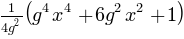

In [38]:
x = symbols('x')
expr = 2*x**2 + ((g/2)*x**2 - 1/(2*g))**2
expr = factor(simplify(expr))
expr

In [39]:
u,v=symbols('u,v')
expr = sqrt(sqrt(expr) - (S(1)/2)*g*x**2 + S(1)/(2*g) )
t_expr = solve(expr-v,x)

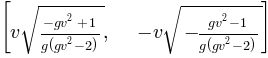

In [40]:
t_expr 

In [41]:
t_expr = t_expr[0]
t_expr=t_expr-uz/g
t_expr.subs({uz:150,g:-9.81, v:0})

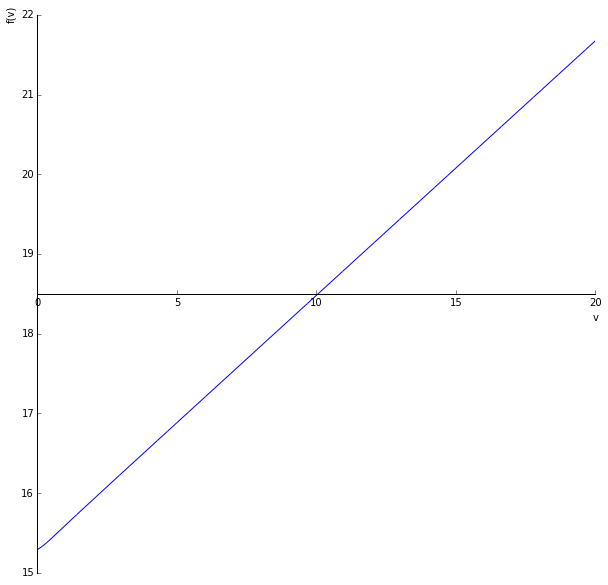

In [53]:
plot(t_expr.subs({uz:150,g:-9.81}),(v,0,20))

As we can see, $v$ varies linearly with $t$

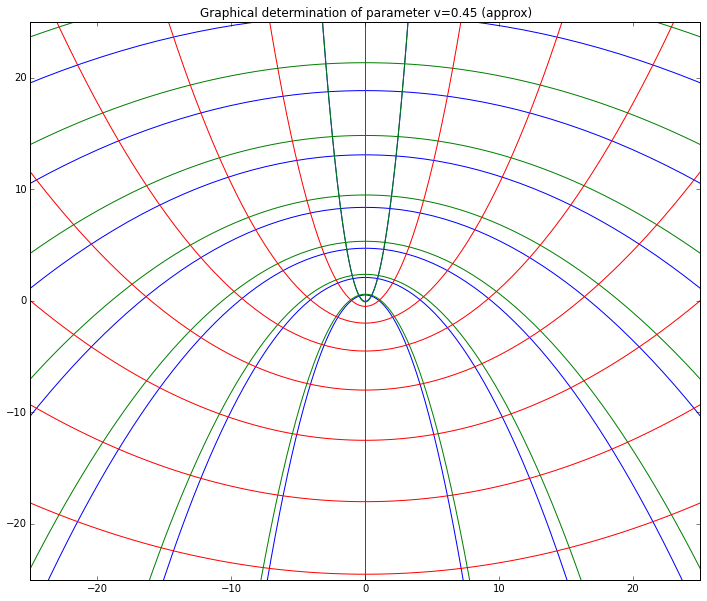

In [51]:
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)

tt = np.linspace(0, 50, 1000)
zz = -(-9.81/2)*(tt - 150/9.81)**2 - 1/(2*9.81) 
xx = (np.sqrt(2)*(tt-150/(9.81))) 



ax.plot(xx, zz, label='parametric curve')

ax.set_xlim(-25,25)
ax.set_ylim(-25,25)
theta = np.linspace(0, 2* np.pi, 1000)
uu = np.linspace(-50, 50, 1000)


for i in range(0,20):
    mul = dsdv_x_dvdt.subs({t:i})
    vv = i*mul*0.3
    x  = 0.5 * (vv**2 -uu**2)
    y = uu*vv
    z = 0
    ax.plot(y, x, label='parametric curve', color='b')
   
    vv = i*ds
    x  = 0.5 * (vv**2 -uu**2)
    y = uu*vv
    z = 0
    ax.plot(y, x, label='parametric curve', color='g')
    

vv= np.linspace(-50, 50, 1000)
#for i in range(1,2):


for i in range(0,20):
    uu = i
    x  = 0.5 * (vv**2 -uu**2)
    y = uu*vv
    z = 0
    ax.plot(y, x,  label='parametric curve', color='r')

    
uu = 0.45#i/2
x  = 0.5 * (vv**2 -uu**2)
y = uu*vv
z = 0
ax.plot(y, x, label='parametric curve', color='g')
plt.title('Graphical determination of parameter v=0.45 (approx)')

In [12]:
# I need a function, like vpow2 but with z as a parameter
z=  symbols('z')
v_pow222 = sqrt( 2*(t+uz/g)**2 + z**2 ) + z
# at x = 0, v is the line called the z-axis
v_pow222 = 2*z
sqrt(v_pow222.subs({z:4}))

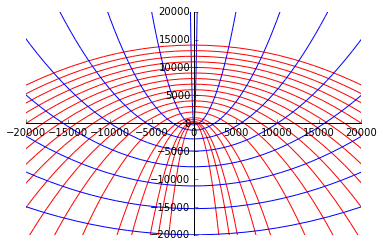

In [25]:
p0 = plot_parametric((u*2,0.5*(u**2-4)),(u,-280,280), xlim=(-20000,20000),ylim=(-20000,20000),show=False)
for a in range(1,15):
    #p = 
    #L =  75*(v_pow2.subs({t:a,uz:15,g:-9.81}))
    v = sqrt(v_pow222.subs({z:1000*a}))
    p0.extend(plot_parametric((u*v,0.5*(v**2-u**2)),(u,-280,280),show=False, line_color='r'))
    

for a in range(1,10):
    #p = 
    p0.extend(plot_parametric((u*(a*25),0.5*(u**2-(a*25)**2)),(u,-280,280),show=False))
#p0.extend(plot_parametric((u*(1),0.5*((1)**2-u**2)),(u,-280,280),show=False))
p0.show()
#p1 = plot3d(0.5*(u**2 - v**2),(v,-10,10),(u,-10,10))

In [81]:
v=symbols('v')
N(integrate(sqrt(0.4515**2 + v**2),(v,sqrt(1),sqrt(221))) -integrate(sqrt(0.4514**2 + v**2),(v,sqrt(301),sqrt(521))) )

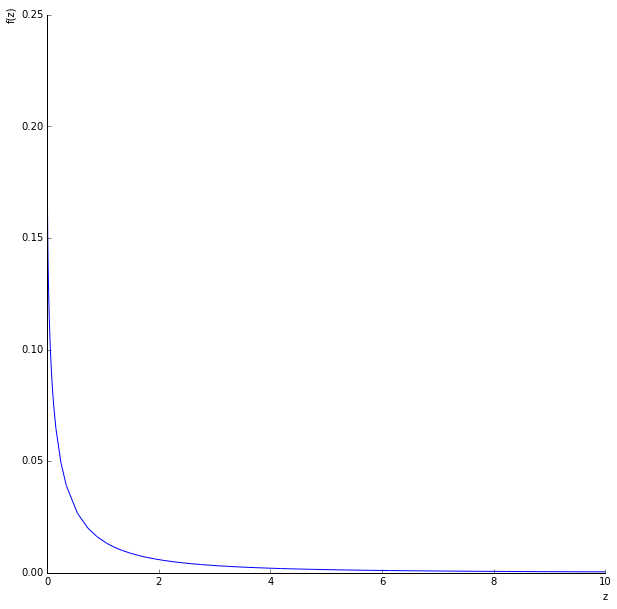

In [111]:
plot(N(integrate(sqrt(0.4515**2 + v**2),(v,sqrt(2*z),sqrt(2*(z+1)))) -integrate(sqrt(0.4514**2 + v**2),(v,sqrt(2*(z+1)),sqrt(2*(z+2)))) ), (z,0,10) )

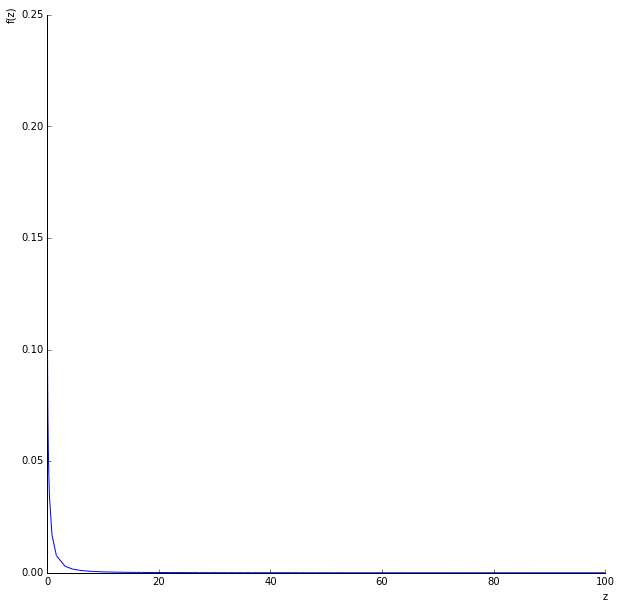

In [112]:
plot(N(integrate(sqrt(0.4515**2 + v**2),(v,sqrt(2*z),sqrt(2*(z+1)))) -integrate(sqrt(0.4514**2 + v**2),(v,sqrt(2*(z+1)),sqrt(2*(z+2)))) ), (z,0,100) )

In [170]:
z1= N(1/2 * (  -9.81*(0 - 150/9.81)**2  + 1/9.81 ) )
z2= N(1/2 * (  -9.81*(25 - 150/9.81)**2 + 1/9.81 ) )
print z1
print z2
x1= N((sqrt(2)) * (  (0 - 150/9.81) ))# + 1/9.81 ) )
x2= N((sqrt(2)) * (  (25 - 150/9.81) ))# + 1/9.81 ) )
print x1
print x2
# height at the top compared to focus, the gap 
#1146.738, 1146.78899083

-1146.73802242610
-462.363022426096
-21.6240605867446
13.7312784725828


In [171]:
v_1= sqrt( sqrt( x1**2 + z1**2) - z1 )
v_2= sqrt( sqrt( x2**2 + z2**2) - z2 )
u_1= sqrt( sqrt( x1**2 + z1**2) + z1 )
u_2= sqrt( sqrt( x2**2 + z2**2) + z2 )
print v_1
print v_2
print u_1
print u_2

47.8923784060754
30.4126601267719
0.451513608353337
0.451498764506110


In [172]:
print sqrt( sqrt( (13.7312784725828)**2 +462.363022426096**2) + 462.363022426096 )

30.4126601267719


In [175]:
N(integrate(sqrt( (u_1)**2 + v**2),(v,1/(9.81),(v_1))) +integrate(sqrt((u_1)**2 + v**2),(v,1/(9.81),(v_2))))

In [164]:
1/(9.81)

In [ ]:
#This of course begs the question, what is the value of v at the point focus_x
delta_x = 

In [76]:
z_=((g/2)*(t+uz/g)**2 - (uz**2 )/(2*g))
x_=ux*(t+uz/g)
u_pow2 = sqrt( x_**2 + z_**2 ) + z_
v_pow2 = sqrt( x_**2 + z_**2 ) - z_
u_1= sqrt(u_pow2.subs({t:0,ux:sqrt(2),uz:150,g:-9.81}))
u_2= sqrt(u_pow2.subs({t:25,ux:sqrt(2),uz:150,g:-9.81}))
v_1= sqrt(v_pow2.subs({t:0,ux:sqrt(2),uz:150,g:-9.81}))
v_2= sqrt(v_pow2.subs({t:25,ux:sqrt(2),uz:150,g:-9.81}))
print N(v_1)
print N(v_2)
print N(u_1)
print N(u_2)

47.8923784060754
30.4126601267719
0.451513608353337
0.451498764506172


And it becomes clear that I was *wrong* about the arc length being equal ...
proof.


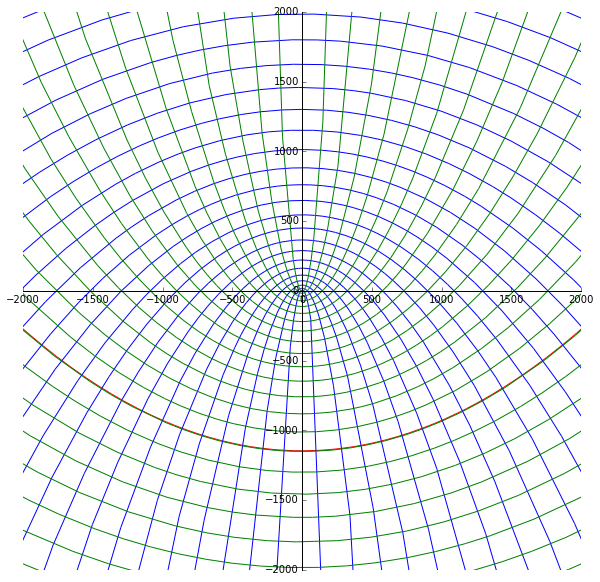

In [72]:
plt.rcParams['figure.figsize'] = 10, 10
p1=plot_parametric(x_.subs({ux:150,uz:150,g:-9.81}),-z_.subs({ux:150,uz:150,g:-9.81}), (t,0,35),xlim=(-2000,2000),ylim=(-2000,2000),show=False, line_color='r')
for a in range(1,25):
    #p = 
    #L =  75*(v_pow2.subs({t:a,uz:15,g:-9.81}))
    v = 3*a#sqrt(50*2*a)
    p1.extend(plot_parametric((u*v,0.5*(v**2-u**2)),(u,-2800,2800),show=False))
    

for a in range(1,25):
    #p = 
    v=3*a
    p1.extend(plot_parametric((u*(v),0.5*(u**2-(v)**2)),(u,-2800,2800),show=False, line_color='g'))
#p0.extend(plot_parametric((u*(1),0.5*((1)**2-u**2)),(u,-280,280),show=False))
p1.show()

### Problem solved. 

The parameter $z$ is varied linearly and the value for $v$ is computed at the point $x=0$, the equation reduces simply

$$v^2 = sqrt(x^2+z^2)+z$$
then of course, 

$$ v^2 = sqrt(z^2) + z = 2z $$

Then subtracting successive integrations of arc length has shown this to be correct, except for the region 0-2, where the error is very small. This problem at the point z=0 is obvious from the charts, the parabolas are not with their topmost point (vertex) at the origin, the focus is at the point instead. This explains the inconsistencies in the integration.

let $\epsilon$ be the error, then I assume the integral should be performed from $0+\epsilon$ to avoid the error.

from approximation and guesswork (since the standard parabola equation does not have a $-1/g$ term) that

$$\epsilon \approx \frac{1}{g}$$

and at *any* scale the error will be $\epsilon_{sc} = scale\ \epsilon$ - the error is magnified by scaling.




I solved for $t$ setting $ds/dv=1$ and the real part of each root is the time to reach the maxima of the trajectory, this means that for one arc (and remember the integrals were divided into 2 parts to account for the fact that the integral passes over zero and v is always positive and will have 2 intersection points) the time was 15.29 ... we already knew this

In [520]:
v_1 = sqrt(v_pow2.subs({t:0,uz:150,g:-9.81}))
v_2 = sqrt(v_pow2.subs({t:25,uz:150,g:-9.81}))
u_ = sqrt(u_pow2.subs({t:15,uz:150,g:-9.81}))
N(integrate(sqrt(u_**2 + v**2),(v,0,v_1)) +integrate(sqrt(u_**2 + v**2),(v,0,v_2)))
# more accurate version of this integral - I am not sure how to evaluate u_ to get
# a correct number, it is a small difference between the value at t=0 and t=15, 
# however the latter seems to fix the integration, there is however also an 
# error if t=15.29 ... 

In [176]:
pure_integral = integrate(sqrt( (u_1)**2 + v**2),v)

In [3]:
from sympy import *
from __future__ import division
z1= N(1/2 * (  -9.81*(0 - 150/9.81)**2  + 1/9.81 ) )
z2= N(1/2 * (  -9.81*(25 - 150/9.81)**2 + 1/9.81 ) )
print z1
print z2
x1= N((sqrt(2)) * (  (0 - 150/9.81) ))# + 1/9.81 ) )
x2= N((sqrt(2)) * (  (25 - 150/9.81) ))# + 1/9.81 ) )
print x1
print x2
# height at the top compared to focus, the gap 
#1146.738, 1146.78899083


-1146.73802242610
-462.363022426096
-21.6240605867446
13.7312784725828


In fact another way of attempting the natural representation of the curve is to solve the
Frenet equations.

In the case of a plane curve $\tau =0$, there is no torsion. So the equations reduce to an easier form. First let 

$$\mathbf t = cos(\phi)\mathbf e_1 +sin(\phi)\mathbf e_2$$
   
then
$$\mathbf t = -sin(\phi)\mathbf e_1 +cos(\phi)\mathbf e_2$$

and
$$\frac{d\mathbf t}{ds} = \frac{d\phi}{ds}\mathbf n $$
$$\frac{d\mathbf n}{ds} = -\frac{d\phi}{ds}\mathbf t $$
  
$$\frac{d\mathbf t}{ds} = \kappa \mathbf n $$ and $$\frac{d\mathbf n}{ds} = -\kappa \mathbf t$$

then $\dot{\phi} = \kappa$ so $\phi=\int \kappa ds + \mathbf C_1 $ changing $\mathbf C_1$ is a rotation

the curve is 

$$\mathbf \alpha (t) = \int \mathbf t ds +\mathbf C_2 =\int cos(\phi)\mathbf e_1 +sin(\phi)\mathbf e_2 ds + \mathbf C_2$$

If $\kappa \neq 0$ for all $s$ and then $\dot \phi \neq 0$ for all s, $\phi=\phi(s)$ can be introduced.

$$\mathbf \alpha (t)  =\int cos(\phi(s))\mathbf e_1 +sin(\phi(s))\mathbf e_2 \frac{ds}{d\phi}d\phi + \mathbf C_2$$

and $\frac{ds}{d\phi} = \frac{1}{\dot\phi}=\frac{1}{\kappa(\phi)}$

sqrt(g**2*u_x**2)/(g**2*(2*t + 2*u_z/g)**2/4 + u_x**2)**(3/2)


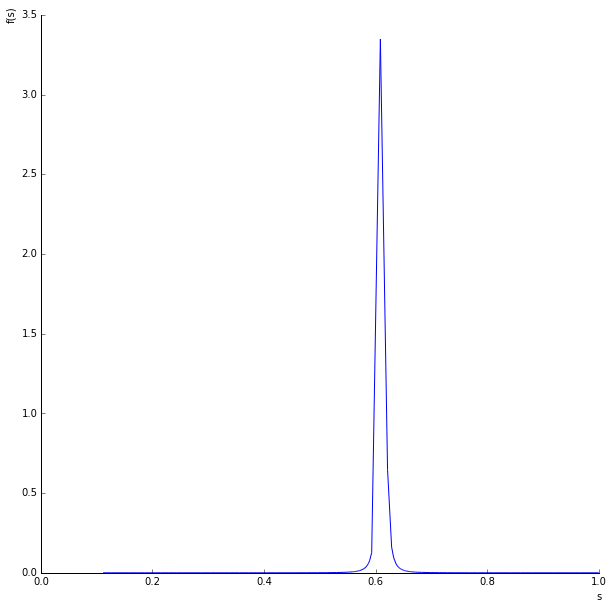

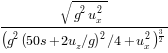

In [68]:
from sympy import *
from sympy.vector import *
from sympy.plotting import plot_parametric
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 10
from sympy import cos, sin, pi
u,v = symbols('u v')
s,g,ux,uz,t=symbols('s,g,u_x,u_z, t')

def kappa2(c, t):
    c_prime = diff(c,t)
    c_prime2 = diff(c_prime,t)
    c_prime_mag = c_prime.magnitude()
    return (c_prime.cross(c_prime2)).magnitude() / (c_prime_mag**3)

e = CoordSysCartesian('e')
r_planar = ux*(t+uz/g)*e.i + (S(1)/2)*(g*(t+uz/g)**2-uz**2/g)*e.k

x=symbols('x')


plt.rcParams['figure.figsize'] = 10,10
kappa_expr =kappa2(r_planar,t)
print kappa_expr
#plot(kappa_expr.subs({uz:150,g:-9.81}),(t,0,25))
kappa_expr = kappa_expr.subs({t:25*s})

plot(kappa_expr.subs({ux:sqrt(2),uz:150,g:-9.81}),(s,0,1))
kappa_expr

sqrt(g**2*u_x**2)/(25*g*u_x**2*sqrt(u_x**2/(25*g*s + u_z)**2 + 1))


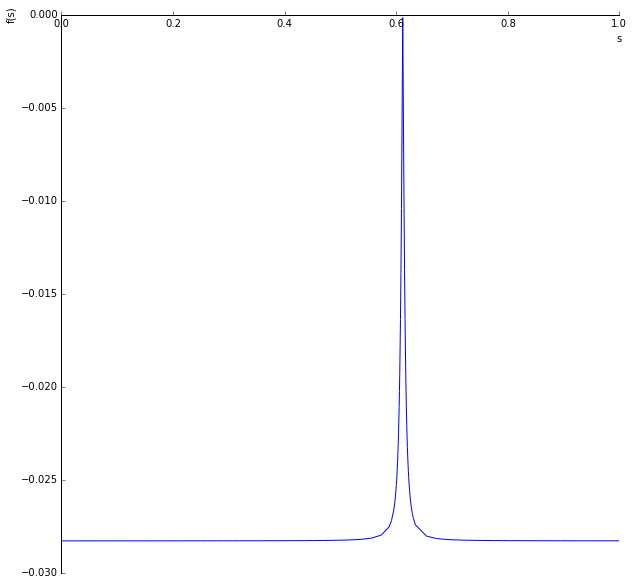

In [69]:
s1,C=symbols('s1 C')

phi = integrate(kappa_expr,s) # =kappa2(r_planar,t)
print simplify(phi)
#phi =
plot( phi.subs({ux:sqrt(2),uz:150,g:-9.81}),(s,0,1))

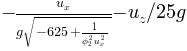

In [70]:
phi2 = symbols('phi2')
s2 = solve(phi-phi2,s)[0]
init_printing(use_latex=true)
#s2 = simplify(s2)
s2

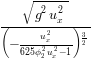

In [71]:
kappa_expr = simplify(kappa_expr.subs({s:s2}))
kappa_expr 
#kappa3= simplify(kappa3.subs({s:s2}))

Ok, now we have the problem ... the function



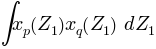

In [61]:
#x_p, x_q, x_w = symbols('x_p x_q x_w', cls=Function)
Z_p, Z_q, Z_w = symbols('Z_1 Z_2 Z_3')
x_p = Function('x_p')(Z_p)
x_q = Function('x_q')(Z_p)
integrate(x_p*x_q, Z_p).doit()

In [72]:
F_phi = 1/kappa_expr
int_F_phi = integrate(expand(F_phi),phi2).doit()

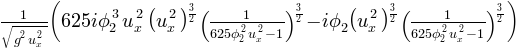

In [73]:
int_F_phi
#curve = integrate( (1/kappa_expr) * (cos(phi2)*e.i + sin(phi2)*e.k),phi2)

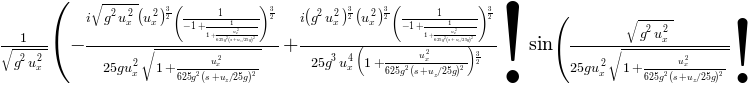

In [74]:
curve_x =  int_F_phi * cos(phi2)
curve_z =  int_F_phi * sin(phi2)
curve_x.subs({phi2:phi})
curve_z.subs({phi2:phi})
#curve.subs(k,phi)

This is based on the following ...

$$ \int F(\phi) \cos\phi\ d\phi $$ 
   
using integration by parts ...

$$ = \cos \phi\ \int F(\phi)\ d\phi - \int \sin\phi\ \left(\int F(\phi)d\phi \right) d\phi $$

now the second term is equal to

$$ \int \sin\phi\ \left(\int F(\phi)\ d\phi \right)\ d\phi = -\cos\phi\ \int F(\phi) d\phi + \int \cos\phi\ F(\phi) d\phi $$

As the second term is subtracted, we can rearrange to 

$$ \int F(\phi) \cos \phi\ d\phi = \cos \phi\ \int F(\phi)\ d\phi $$

and the same for the sin term. Below is a plot of our curve if we simply plot $\phi$ without substituting. The integration failed to produce the original curve if the variable $\phi$ is substituted for $\phi_2(s)$ and the graphical output is simply a line. 

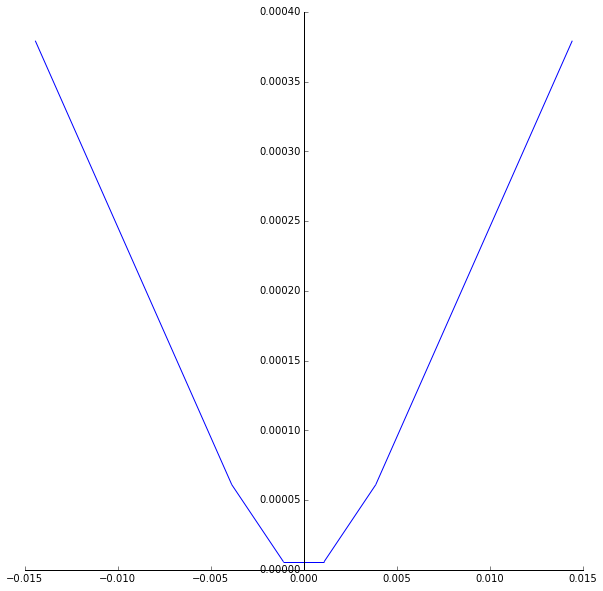

Plot object containing:
[0]: parametric cartesian line: (0.0509683995922528*sqrt(2)*(2500*sqrt(2)*I*phi2**3*(1/(1250*phi2**2 - 1))**(3/2) - 2*sqrt(2)*I*phi2*(1/(1250*phi2**2 - 1))**(3/2))*cos(phi2), 0.0509683995922528*sqrt(2)*(2500*sqrt(2)*I*phi2**3*(1/(1250*phi2**2 - 1))**(3/2) - 2*sqrt(2)*I*phi2*(1/(1250*phi2**2 - 1))**(3/2))*sin(phi2)) for phi2 over (-1.5707963267948966, 1.5707963267948966)


In [79]:
from sympy import pi
curve = curve_x.subs({ux:sqrt(2), g:-9.81,uz:150}) * e.i +  curve_z.subs({ux:sqrt(2), g:-9.81,uz:150}) * e.k
#print curve
print plot_parametric( (curve.dot(e.i), curve.dot(e.k)), (phi2,-pi/2,pi/2),adaptive=false,nb_data_points=100)

Note: If trigonometric functions are chosen to be the initial derivatives in the integration by parts formula, a different picture emerges...

$$ \int F(\phi) \cos\phi\ d\phi = F(\phi)\ \sin\phi - \int \sin\phi\ F'(\phi)\ d\phi $$
   
then

$$ = F(\phi)\ \sin\phi - \left(-\cos(\phi) F'(\phi) + \int \cos\phi\ F''(\phi)\ d\phi\right) $$
   
and
   
$$ = F(\phi)\ \sin\phi - (-\cos(\phi) F'(\phi) + \left(\sin\phi\ F''(\phi) - \int \sin\phi\ F'''(\phi)\ d\phi\right)) $$ 
   
etc, and $F(\phi)$ appears to be continuously differentiable, of class $C^{\infty}$

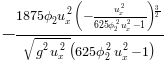

In [273]:
diff(F_phi,phi2)

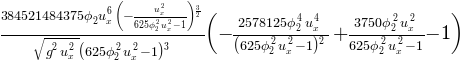

In [274]:
diff(F_phi,phi2,5)

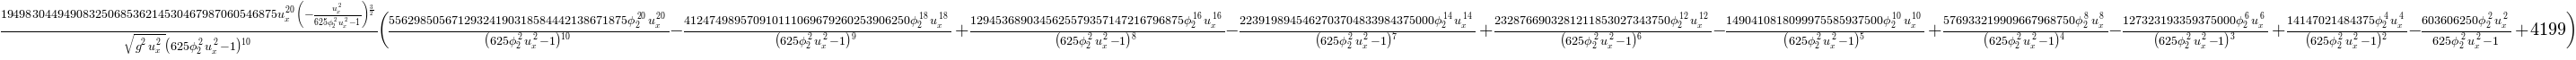

In [275]:
diff(F_phi,phi2,20)

So perhaps attempting the most accurate version of the integral with sympy will cause the computer to hang - I don't know. 

$$ \int \frac{1}{\kappa(\phi)} \left( \cos \phi\ \mathbf i + \sin \phi\ \mathbf k \right)\ d\phi$$

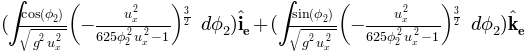

In [305]:

curve2 = integrate( F_phi *(cos(phi2)*e.i + sin(phi2)*e.k),phi2)
curve2

but this integral does not seem to work in sympy at the moment. The other integral is the simpler

$$ \int \left(\cos \phi(s)\ \mathbf i+\sin \phi(s)\ \mathbf j \right) ds $$
   
But again the doit() command seems to hang for ages. 

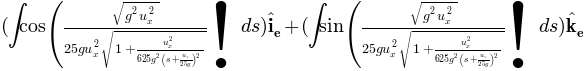

In [240]:
curve3 = integrate(  (cos(phi)*e.i + sin(phi)*e.k),s)
curve3

Now this integral really needs a substitution, $\phi$, so to evaluate, 

$$\int (\cos \phi\ \mathbf i + \sin \phi\ \mathbf k)\ ds $$

noting that 
   
$$ \frac{d\phi}{ds} = \kappa$$

then $ ds = d\phi\ / \kappa $

$$\int \frac{1}{\kappa}(\cos \phi\ \mathbf i + \sin \phi\ \mathbf k)\ d\phi $$

as above. $\kappa$ is re-parameterized a function of $\phi$ and  
$\kappa$ is a function of its integral, the expression for $\phi$ is solved for $s$ and substitued into $\kappa$ in place of $s$. This is an allowable change of parameter.
[proof needed]


In [ ]:
kappa_expr_orig = kappa2(r_planar,t).subs({t:25*s}).subs({s:s2})
curve2 = integrate( (1/kappa_expr_orig) *(cos(phi2)*e.i + sin(phi2)*e.k),phi2)
curve2 = curve2.doit()
curve2

In [269]:
plt.rcParams['figure.figsize'] = 3,10

curve2 = curve2.subs({ux:sqrt(2),g:-9.81,uz:150 })
curve2

 ⎛                                                                            
 ⎜                      ⎛                                                     
⎜                      ⎜          ⎛                                          ⎛
 ⎜                      ⎜          ⎜                                          
 ⎜                      ⎜          ⎜                                          
 ⎜                      ⎜          ⎜                                          
 ⎜                      ⎜          ⎜                                          
 ⎜0.0509683995922528⋅√2⋅⎜24.059025⋅⎜30.5810397553517⋅φ₂ + 5.09683995922528⋅√2⋅
 ⎜                      ⎜          ⎜                                          
 ⎜                      ⎜          ⎜                                          
 ⎜                      ⎜          ⎜                                          
 ⎜                      ⎜          ⎜                                          
 ⎝                      ⎝          ⎝                

(2*sin(s/2))*e.i + (-2*cos(s/2))*e.k


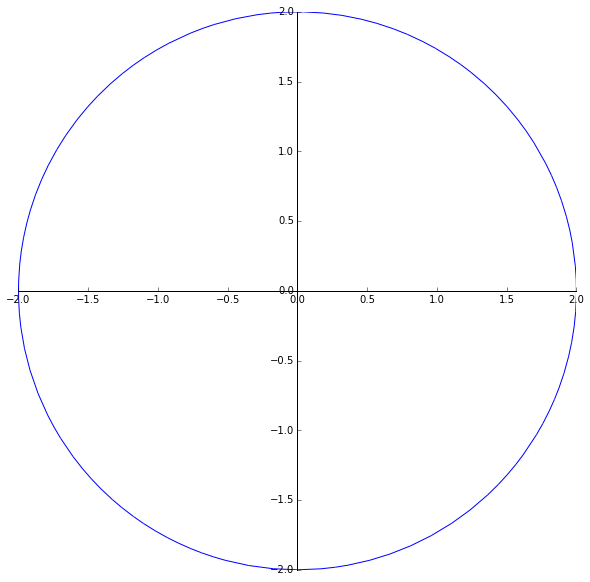

In [317]:
## lets run that same problem for a circle.
R, phi_circ=symbols('R, phi_circ')
kappa_circ = 1/R
phi_expr_circ = integrate(kappa_circ,s).doit().subs({R:2})
#s_phi_circ = solve((phi_expr_circ - phi_circ),s)
# for the circle, the curvature is constant.
sol_circ = integrate( (cos(phi_expr_circ)*e.i + sin(phi_expr_circ)*e.k),s).doit()
print sol_circ
plot_parametric((sol_circ.dot(e.i), sol_circ.dot(e.k)), (s,0,4*pi)) # 2*pi*R

In [106]:
omega,theta = symbols('omega, theta')

kappa_log_spiral = 1/s

#plot( kappa_parabola,(s,0,1) )
kappa_log_spiral

In [107]:
phi_expr_log_spiral = integrate(kappa_log_spiral,s).doit()
phi_expr_log_spiral

In [108]:
s_expr_log_spiral= solve(phi_expr_log_spiral-theta,s)
s_expr_log_spiral

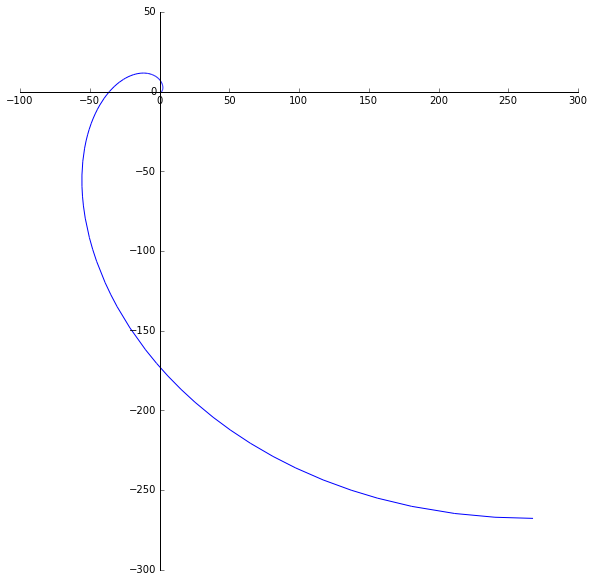

In [109]:
kappa_log_spiral = (kappa_log_spiral).subs({s:s_expr_log_spiral[0]}) 

log_spiral = integrate( ((1/kappa_log_spiral))* (cos(theta)*e.i + sin(theta)*e.k),theta).doit()
plot_parametric((log_spiral.dot(e.i), log_spiral.dot(e.k)),(theta,0,2*pi))



###### Arc Length As Parameter</div>
   
$s=s(t)$ is an allowable change in parameter on $\mathbf I$ since $ds/dt = |d\mathbf r/dt| $ from the definition of the integral. This representation can travel either forwards or backwards, and is therefore not unique. The natural representation of a curve in terms of arc length is $|d\mathbf r/dt| = 1$. 

<div style="background:red">Example</div>
    For the circle $\mathbf r(\theta)=r\cos(\theta)\mathbf e_1 + r\sin(\theta)\mathbf e_2$ on the interval $0 < \theta_i < \theta $ we consider the intergral <br>
    $$
    s = \displaystyle \int_0^{\theta}  \sqrt { \left(\frac{dx_1}{d\theta}\right)^2 +\left(\frac{dx_2}{d\theta}\right)^2 } d\theta  
    $$
    evaluating
    $$
    s=\displaystyle \int_0^{\theta}  \sqrt { r^2 \cos^2(\theta) +r^2 \sin^2(\theta) } d\theta =  \int_0^{\theta}  r d\theta  = [r\theta]_0^{\theta} = r \theta 
    $$
    and so $\theta = \frac{s}{r}$  and the natural representation is  $\mathbf r(s/r)=r\cos(s/r)\mathbf e_1 + r\sin(s/r)\mathbf e_2$. This is checked easily by setting the limit $s=2\pi r$ and we find the final point in $\theta$ is $2\pi$.
    <br>

<div style="background:red"><h2>Curvature and Torsion</h2></div><br>
    A regular curve can be uniquely determined by two scalar quantities, curvature and torsion. <br>

<div style="background:red">Unit Tangent Vector</div>
    If $\mathbf r=\mathbf r(s)$ is a natural representation of a regular curve C then the tangent to the curve is <br>
    $$
    \displaystyle \mathbf{\dot r}(s) = \frac{d\mathbf r}{ds} =\lim_{\Delta s \to 0} \frac{ \mathbf r(s+\Delta s)-\mathbf r(s)}{\Delta s}
    $$
    Where the quantity $\frac{ \mathbf r(s+\Delta s)-\mathbf r(s)}{\Delta s}$ is a secant to the curve C. The vector $\mathbf {\dot r}$ is of unit length in the natural representation. If $\mathbf r=\mathbf r(\bar s)$ is any other natural representation then <br>
    $$
    \frac{d\mathbf r}{d\bar s} = \frac{d \mathbf r}{ds}\frac{ds}{d\bar s} = \pm \frac{d \mathbf r}{ds} 
    $$
    since the direction can be the same or opposite. The unit tangent vector can be denoted $\mathbf t=\mathbf t(s)=\mathbf {\dot r}(s)$. <br>

<div style="background:red">Definition</div><br>
    If $\mathbf r=\mathbf r(t)$ is an abritrary representation of C with the same orientation as $\mathbf r=\mathbf r(s)$ then <br>
    $$
    \mathbf r' = \frac{d\mathbf r}{dt} = \frac{d \mathbf r}{ds}\frac{ds}{dt} = \mathbf t \left|\frac{d \mathbf r}{dt}\right| = \mathbf t |\mathbf r'| 
    $$
    since <br>
    $$
    \frac{ds}{dt} = \left | \frac{d\mathbf r}{dt}\right| 
    $$

<div style="background:red">Tangent Line and Normal Plane</div><br>
    The straight line through a point $\mathbf r$ on a regular curve $C$ parallel to the tangent vectors at $\mathbf r$ is called a tangent line to $C$ at $\mathbf r$. <br>
    $$
    \mathbf r = \mathbf r_0 + k \mathbf t_0 \qquad\qquad -\infty < k < \infty
    $$
    Where $\mathbf t_0=\mathbf t(t_0)$ is the unit tangent of $\mathbf r$ at $t=t_0$. The plane through $\mathbf r$ orthogonal to the tangent line is called the normal plane. 

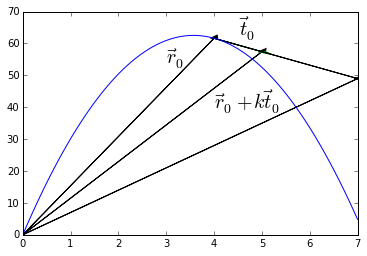

In [15]:
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.gca()
t = np.linspace(0, 7, 100)

# initial velocity
ux = 1
uy = -1
uz = 35

v = (ux**2 + uy**2 + uz**2)**(0.5)

# acceleration due to gravity
a = -9.81

# x and y are initial velocity times time
x = ux*t
y = uy*t

# now the parabola
z = v * t +0.5*a*t**2  

ax.plot(x, z, label='parabola')
t0 = 4
t1 = 6
z_t0 = v*t0 + 0.5 * a * t0**2
z_t1 = v*t1 + 0.5 * a * t1**2

# tangent T at t0
T_t0z = v + a*t0

T_t0x = 1
 

ax.arrow(0, 0, t0, z_t0, head_width=0.15, head_length=1.0, fc='k', ec='k')
ax.arrow(0, 0,t0+ 1, ( T_t0z +z_t0) , head_width=0.15, head_length=1.0, fc='k', ec='k')
ax.arrow(0, 0,t0+ 3, ( 3*T_t0z +z_t0) , head_width=0.15, head_length=1.0, fc='k', ec='k')
ax.arrow(t0, z_t0, T_t0x, ( T_t0z) , head_width=0.15, head_length=1.0, fc='g', ec='g')
ax.arrow(t0, z_t0, 3*T_t0x, 3*( T_t0z) , head_width=0.15, head_length=1.0, fc='k', ec='k')
tex = r'$  \vec r_0$'

ax.text(t0-1, z_t0-10, tex, fontsize=20, va='bottom')

tex = r'$  \vec r_0 + k\vec t_0$'

ax.text(t1-2, ( T_t0z +z_t0)-20, tex, fontsize=20, va='bottom')

tex = r'$ \vec t_0$'

ax.text(t0+0.5, ( T_t0z +z_t0)+3, tex, fontsize=20, va='bottom')

<div style="background:red">Definition of Normal Plane</div><br>
    The normal plane at $\mathbf r_0$ is <br>
    $$
    (\mathbf r-\mathbf r_0)\cdot \mathbf t_0 = 0
    $$
    introducing a second variable $\mathbf r$ we can define the tangent line as $\mathbf y = \mathbf r + k \mathbf t$ for the same range of $k$. The normal plane would then be $(\mathbf y-\mathbf r)\cdot \mathbf t = 0$. It should be noted that $\mathbf r'$ is parallel to $\mathbf t$ so <br>
    $$
    \mathbf y= \mathbf r + k \mathbf r' \qquad\qquad -\infty < k < \infty\\ \ \\
     (\mathbf y-\mathbf r_0)\cdot \mathbf r' = 0
    $$
    also define the tangent line and normal plane.

<div style="background:red">Curvature</div><br>
    Assuming that $\mathbf r= \mathbf r(s)$ is a regular curve of class $\geq 2$ then the tangent vector $\mathbf t=\mathbf t(s) = \mathbf {\dot r}(s)$ is of class $C^1$ and the derivative <br>
    $$
    \frac{d\mathbf t}{ds} = \mathbf{\dot t}(s) = \mathbf {\ddot v}(s)
    $$
    is independent of orientation of the curve.

<div style="background:red">Proof</div><br>
     Let $\mathbf r=\mathbf r(\bar s) $ be any other natural representation of the curve C with unit tangent $\mathbf {\bar t}=d\mathbf r/d\bar s$ and $s=\bar s+\epsilon$ where $\epsilon$ is an abritrary constant. Then
         $$
    \frac{d\mathbf {\bar t} }{d\bar s} = \frac{d}{d\bar s}\left(\frac{d\mathbf r}{d \bar s}\right) = \frac{d}{d\bar s}\left(\pm \frac{d\mathbf r}{d  s}\right) =  \pm \frac{d}{d s}\left(\frac{d\mathbf r}{d  s}\right)\frac{ds}{d\bar s} = (\pm 1)^2\frac{d}{ds}\left(\frac{d\mathbf r}{ds}\right) = \frac{d\mathbf t}{ds}
    $$
    Therefore $\mathbf {\dot t}$ is independant of orientation.

<div style="background:red">Definition</div><br>
    The vector $\mathbf {\dot t}(s)$ is called the curvature vector on $C$ at the point $\mathbf r(s)$ and is denoted by $\mathbf k=\mathbf k(s)=\mathbf{\dot t}(s)$.  The vector $\mathbf k$ is orthogonal to $\mathbf t$ and also parallel to the normal plane. When greater than zero it is in the direction that the curve is turning. The magnitude of the curvature vector is <br>
    $$
    |\kappa| = |\mathbf k(s)| 
    $$
    and is called the curvature of $C$ at $\mathbf r(s)$ . The reciprocal of the curvature is called the radius of curvature $\rho = \frac{1}{|\kappa|}$ . 

<div style="background:red">Definition</div><br>
    The curvature is equal to the rate of change of the direction of the tangent with respect to arc length.

<div style="background:red">Definition</div><br>
    If the curvature is zero all along a curve then the curve is a straight line. 

<div style="background:red">Definition</div><br>
    An identity to calculate the curvature is <br>
    $$
    |\kappa|=\frac{|\mathbf r'-\mathbf r''|}{|\mathbf r'|^3}
    $$

<div style="background:red">Principal Normal Vector</div><br>
    If $C$ is of class $\geq 2$ the curvature vector varies continuously along $C$ and the unit vector in the direction of $\mathbf k$ is not defined where $\mathbf k=0$ and may have discontinuities. The principle normal is defined as 
    $$
    \mathbf n = \frac{\mathbf k(s)}{|\mathbf k(s)|}
    $$
    and is defined to be continuous along $C$ when possible. From the definition of curvature <br>
    $$
    \mathbf k(s) = \kappa(s) \mathbf n(s)
    $$
    where $\mathbf n$ has the same direction as $\mathbf k$ we have $\kappa = |\mathbf k|$ and when $\mathbf n$ has the opposite direction then $\kappa = -|\mathbf k|$. At the point of inflection both $\mathbf k$ and $\kappa$ equal zero. Also the identity $\mathbf n\cdot\mathbf n=1$ can be used to multiply both sides of the equation by $\mathbf n$ to give <br>
    $$
    \kappa = \mathbf k(s)\cdot \mathbf n(s)
    $$
    <br> A curve of class $C^{\infty}$ may not have a definite principle normal at a point of inflection. If the curve is analytic then a continuous principal normal will always exist. (if it is not a straight line).

<div style="background:red">Osculating Plane</div><br>
      Analagous to the equations above the principal normal line to $C$ at $\mathbf r$ is given by <br>
      $$
      \mathbf y = \mathbf r + k\mathbf n\qquad -\infty < k < \infty 
      $$
      And the plant parallel to the unit tangent and the principal normal is <br>
      $$
      [(\mathbf y - \mathbf r)\mathbf t \mathbf n] = 0
      $$
      as given by the scalar triple product. This can also be written 
      $$
      [(\mathbf y - \mathbf r)\mathbf{ \dot r} \mathbf {\ddot r}] = 0
      $$      
      <br>
      The osculating plane at a point can be defined as the limiting position of a plane passing through three neighbouring points on a curve as the points approach the given point or as the distance between the intersection points and the given point of evaluation tends to zero. This is a definition of the order of contact with a curve.  

<div style="background:red">Binormal</div><br>
       The vector <br>
       $$
       \mathbf b(s) = \mathbf t(s) \times \mathbf n(s)
       $$
       is defined as the binormal vector to the curve, and is orthogonal to both the tangent and the principal normal. The vector $\mathbf b$ is continuous and of unit length and the three vectors $(\mathbf t, \mathbf n, \mathbf b)$ form a right handed orthonormal triplet or basis. This is called the moving trihedral. The straight line through $\mathbf r$ parallel to $\mathbf b$ is <br>
       $$
       \mathbf y = \mathbf r + k\mathbf b\qquad -\infty < k < \infty
       $$
       and the plane parallel to $\mathbf b$ and $\mathbf t$ is called the rectifying plane <br>
       $$
       (\mathbf y - \mathbf r)\cdot \mathbf n = 0
       $$

<div style="background:red">Torsion</div><br>
       If the curve $\mathbf r=\mathbf r(s)$ is a regular curve of class $\geq 3$ along which $\mathbf n(s)$ is of class $C^1$ then differentiating the binormal <br>
       $$
       \mathbf {\dot b}(s) = \mathbf{\dot t}(s) \times \mathbf{n}(s)+ \mathbf t(s) \times \mathbf{\dot n}(s)= \kappa(s)[ \mathbf n(s)\times \mathbf n(s)] + \mathbf t(s) \times \mathbf {\dot n}(s)= \mathbf t(s)\times\mathbf{\dot n}(s)
       $$
       since $\mathbf a\times \mathbf a=0$. If we claim that $\mathbf{\dot n}$ is a linear combination of $\mathbf t$ and $\mathbf b$ then <br>
       $$
       \mathbf {\dot n}(s) = \mu(s)\mathbf t(s) + \tau(s)\mathbf b(s)
       $$
       and substitution reveals that <br>
       $$
       \mathbf {\dot b}(s) = -\tau(s) \mathbf n(s)
       $$
       where the quantity $\tau(s)$ is called the torsion of the curve. This can be defined in a method analogous to the curvature above <br>
       $$
       \tau = -\mathbf{\dot b}(s)\cdot \mathbf n(s)
       $$
       The sign of $\tau$ is independant of the orientation of C and the direction of $\mathbf n$ and is an intrinsic property of the curve.

<div style="background:red">Definition</div><br>
       The torsion of a plane curve is zero and a curve except for a straight line has zero torision if it is a plane curve.

<div style="background:red">Spherical Indicatrices</div><br>
       The unit vectors on a curve $C$ generate a a curve on a sphere of radius 1. These curves are called spherical indicatrices.
       <br>

<div style="background:red"><h2>Theory</h2></div><br>
            
<div style="background:red">Serret-Frenet equations</div><br>
For a curve $\mathbf r(s)$ The three equations <br>
                 $$\mathbf{\dot t} = \kappa \mathbf n$$
                 $$\mathbf{\dot n}= -\kappa \mathbf t + \tau \mathbf b$$
                 $$\mathbf{\dot b}=-\tau \mathbf n$$
                
and these can be written in matrix notation as <br>
$$\left(\begin{array}{ccc}\mathbf{\dot t} \\ \mathbf{\dot n} \\ \mathbf{\dot b} \end{array}\right) = \left(\begin{array}{ccc} 0& \kappa &0\\ -\kappa & 0 & \tau \\ 0&-\tau &0 \end{array}\right) \left(\begin{array}{ccc}\mathbf t \\ \mathbf n \\ \mathbf b \end{array}\right)$$
<br> 
The matrix form <br>
$$\left(\begin{array}{ccc} 0& \kappa &0\\ -\kappa & 0 & \tau \\ 0&-\tau &0 \end{array}\right)$$

is simpler to remember. These equations can be used to prove that a curve is uniquely defined by its curvature and torsion as functions of a natural parameter, and these functions are intrinsic to the curve, or features of the intrinsic geometry of the curve. If two curves have the same curvature and torsion as functions of a natural parameter, then they are the same except for their position in space.
                <br>

 <div style="background:red">Existence and Uniqueness Theorem</div><br>
                 The Serret-Frenet equations form a system of 3 first order vector differential equations. Given a curvature $\kappa (s)$ and a torsion $\tau(s)$ then apart from the position in space there exists only one unique space curve that satisfies the equations with $s$ as the natural parameter. 
                 <br> note: this is always possible in the case of a plane curve. <br>

<div style="background:red">Involutes</div><br>
                  The tangent lines to a curve $C$ generate a surface called the tangent surface of the curve. A curve $ C_1$ that lies on the tangent surface of $C$ and intersects the tangent lines of $C$  orthogonally is called and involute of $C$. <br>
                  If $\mathbf r=\mathbf r(s)$ and $\mathbf {\bar r}$ is a point on an involute $C_1$ where it intersects with the tangent line of $C$ at $\mathbf r(s)$ then $\mathbf{\bar r}-\mathbf r(s)$ is proportional to $\mathbf t(s)$, the tangent to $C$. Therefore $C_1$ will have a representation <br>
                  $$\mathbf{\bar r}=\mathbf r(s) + k(s)\mathbf t(s)$$
and the rate of change with respect to $s$ is defined as <br>
$$\frac{d\mathbf{\bar r}}{ds} = \mathbf{\dot r} + \dot k \mathbf t + k \mathbf {\dot t} = (1+\dot k)\mathbf t + k\kappa \mathbf n$$
                  is orthogonal to the tangent vector $\mathbf t$ on $C$, this can be shown by computing $(d\mathbf{\bar r}/ds )\cdot \mathbf t = 1+\dot k = 0$ using the above equation. Integrating this gives $k=-s+a$ and there is an infinite family of involutes one for each value of the constant of integration, $a$. These can be defined by <br>
                  $$\mathbf{\bar r}=\mathbf r + (a-s)\mathbf t $$
                  by substituting for $k$ in the above relations. The involute is not regular where the curve $C$ has a point of inflection, and the value $d\mathbf {\bar r}/ds = 0$ where $\kappa=0$. 

  <div style="background:red">Identity</div><br>
                  The curvature of the involute satisfies <br>
                  $$
                  \bar \kappa^2 = \frac{\kappa^2+\tau^2}{(a-s)^2\kappa^2}
                  $$
                  For $\bar \kappa \neq 0$ and $\kappa\neq 0$. <br>
                  It should be noted that if $|\mathbf t|=1$ then the distance between two involutes is constant for all $s$. 

<div style="background:red">Serret-Evolutes</div><br>
                  If $C$ is an involute of a curve $C_1$ then $C_1$ is an evolute of $C$. Let $C$ be denoted by $\mathbf r(s)$ and if $\mathbf {\bar r}(s)$ is the point of contact on the evolute to the tangent line intersecting $C$ at $\mathbf r(s)$ then <br>
                  $$\mathbf{\bar r}(s) = \mathbf r(s) + \alpha (s) \mathbf n (s) + \beta(s) \mathbf b(s)
                  $$
since $\mathbf{\bar r}(s)-\mathbf r(s)$ is orthogonal to $\mathbf t(s)$ and is a linear combination of $\mathbf n(s)$ and $\mathbf b(s)$. Differentiating gives <br>
$$\frac{d \mathbf {\bar r}}{ds} = \mathbf {\dot r} + \dot\alpha\mathbf n + \alpha \mathbf{\dot n} + \dot\beta\mathbf b + \beta\mathbf{\dot b}\\= (1-\alpha\kappa)\mathbf t+ (\dot\alpha-\beta\tau)\mathbf n + (\dot\beta +\tau\alpha)\mathbf b
                  $$
after substituting the frenet equations for the dot terms. This value $(d\mathbf{\bar r}/ds)$ is also tangent to $C_1$ and is proportional to 
                  $$\mathbf{\bar r}-\mathbf r = \alpha \mathbf n + \beta \mathbf b
                  $$
and there exists a $k$ such that (need theorom, suppose this is the tangent line)
                  $$1-\alpha \kappa = 0,\qquad (\dot\alpha-\beta\tau)=k\alpha,\qquad(\dot\beta+\tau\alpha)=k\beta
                  $$
so $\alpha = 1/\kappa$ and the variable $k$ can be eliminated <br>
                  $$\beta(\dot\alpha-\beta\tau)-\alpha(\dot\beta+\tau\alpha)=0
                  $$
and solving for $\tau$ we find <br>
                  $$\tau = \frac{\beta\dot\alpha-\alpha\dot\beta}{\alpha^2+\beta^2} = \frac{d}{ds}\cot^{-1}(\beta/\alpha)
                  $$
and integration gives <br>
                  $$\beta = \alpha \cot\left(\int \tau ds + c \right) = \frac{1}{\kappa} \cot\left(\int \tau ds + c \right) 
                  $$
and this gives an infinite family of evolutes <br>
                  $$\mathbf {\bar r} = \mathbf r + \frac{1}{\kappa} \mathbf n + \frac{1}{\kappa} \cot\left(\int\tau ds +c \right)\mathbf b
                  $$
and so the assumption is that along $C$ the value $(\dot\alpha-\beta\tau)^2+(\dot\beta+\tau\alpha)^2 \neq 0$. If $C$ is a plane curve then $\tau=0$ and $\alpha = \gamma\beta$ with $\gamma$ a constant, and 
                  $$(\dot\alpha-\beta\tau)^2+(\dot\beta+\tau\alpha)^2 = \frac{\dot \kappa^2}{\kappa ^4}(1+\gamma^{-2}).$$
And for plane curves it is assumed that $\dot\kappa \neq 0 $.
                  Needs more information here

<div style="background:red">Definition of contact with a surface</div><br>
                  A curve $\mathbf r=x_1(t)\mathbf e_1 + x_2(t)\mathbf e_2 + x_3(t)\mathbf e_3$ has n-point contact with a surface $F(x_1,x_2,x_3)=0$ at the point corresponding to $t=t_0$ if the function <br>
                  $$f(t)=F(x_1(t),x_2(t),x_3(t))
                  $$
satisfies
                  $$f(t_0)=f'(0)=f''(0)=\cdots=f^{(n-1)}(t_0)=0\qquad but\qquad f^{(n)}(t_0)\neq 0 
                  $$
and this is independant of the parameterization of the curve.

<div style="background:red">Definition of contact with a curve</div><br>
                  A curve $C$ is denoted as $\mathbf r=x_1(t)\mathbf e_1 + x_2(t)\mathbf e_2 + x_3(t)\mathbf e_3$ and a second curve $C_1$ is defined by the intersection of two surfaces $F$ and $G$ both functions of $(x_1,x_2,x_3)$ then the curve  $C$ has n-point contact at $t_0$ if and only if there is n-point contact with one of the surfaces and at least n-point contact with the other.